**Autor** : Jeferson Magalhães dos Santos

**e-mail**: jefersonmdossantos@gmail.com
    
**github**: jefersonmglh

#  <a name="indice">  Índice </a>

* [Resumo](#resumo)
* [1. Importação de pacotes e dados](#import)
* [2. Análise preliminar](#visualizacao)
* [3. Tratamento](#tratamento)
* [4. Correlação e Associação](#corr)
* [5. Treinamento do modelo](#modelo)


#  <a name="resumo"> RESUMO </a>
[Voltar ao índice](#indice)

""

#  <a name="import">1. Importação de pacotes e dados </a>
[Voltar ao índice](#indice)

In [1]:
#basic
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

#graph
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
# import chart_studio.plotly as cplt
# import plotly.graph_objs as go

# #model&metrics
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import *
from scipy.stats import chi2, chi2_contingency, iqr, pearsonr
from sklearn.preprocessing import StandardScaler




In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# df = pd.read_csv('microdados_enem_2021_clean.csv')
# df.head()

df = pd.read_csv('/content/drive/MyDrive/enem/microdados_enem_2021_clean.csv')
df.head()


# with open('./drive/MyDrive/Colab Notebooks/semantix_project/microdados_enem_2021_clean.csv', 'a') as doc:
#   with open('test.txt', 'wb') as f:
#         pickle.dump(doc, f)

,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,SG_UF_ESC,...,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
0,5,F,1,1,1,3,1,NaN,0,NaN,...,A,A,A,B,A,A,B,A,B,B
1,12,M,1,1,1,11,1,NaN,0,NaN,...,A,A,A,B,A,A,C,A,A,A
2,13,F,3,1,1,15,1,NaN,0,NaN,...,B,A,A,B,A,A,C,B,B,B
3,3,M,1,3,1,0,2,1.0,0,CE,...,A,A,A,B,A,A,B,A,B,B
4,2,F,1,3,1,0,2,1.0,0,CE,...,B,A,A,B,A,B,E,A,B,B


#  <a name="visualizacao">2. Análise preliminar</a>
[Voltar ao índice](#indice)

In [4]:
def show_info(data):
    print('DATASET SHAPE: ', data.shape, '\n')
    print('-'*50)
    print('FEATURE DATA TYPES:')
    print(data.info())
    print('\n', '-'*50)
    print('NUMBER OF UNIQUE VALUES PER FEATURE:', '\n')
    print(data.nunique())
    print('\n', '-'*50)
    print('NULL VALUES PER FEATURE')
    print(data.isnull().sum())

show_info(df)

DATASET SHAPE:  (3389832, 42) 

--------------------------------------------------
FEATURE DATA TYPES:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3389832 entries, 0 to 3389831
Data columns (total 42 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   TP_FAIXA_ETARIA         int64  
 1   TP_SEXO                 object 
 2   TP_ESTADO_CIVIL         int64  
 3   TP_COR_RACA             int64  
 4   TP_NACIONALIDADE        int64  
 5   TP_ANO_CONCLUIU         int64  
 6   TP_ESCOLA               int64  
 7   TP_ENSINO               float64
 8   IN_TREINEIRO            int64  
 9   SG_UF_ESC               object 
 10  TP_DEPENDENCIA_ADM_ESC  float64
 11  TP_LOCALIZACAO_ESC      float64
 12  TP_SIT_FUNC_ESC         float64
 13  NU_NOTA_CN              float64
 14  NU_NOTA_CH              float64
 15  NU_NOTA_LC              float64
 16  NU_NOTA_MT              float64
 17  Q001                    object 
 18  Q002                    object 
 19  Q0

missing values


<Axes: >

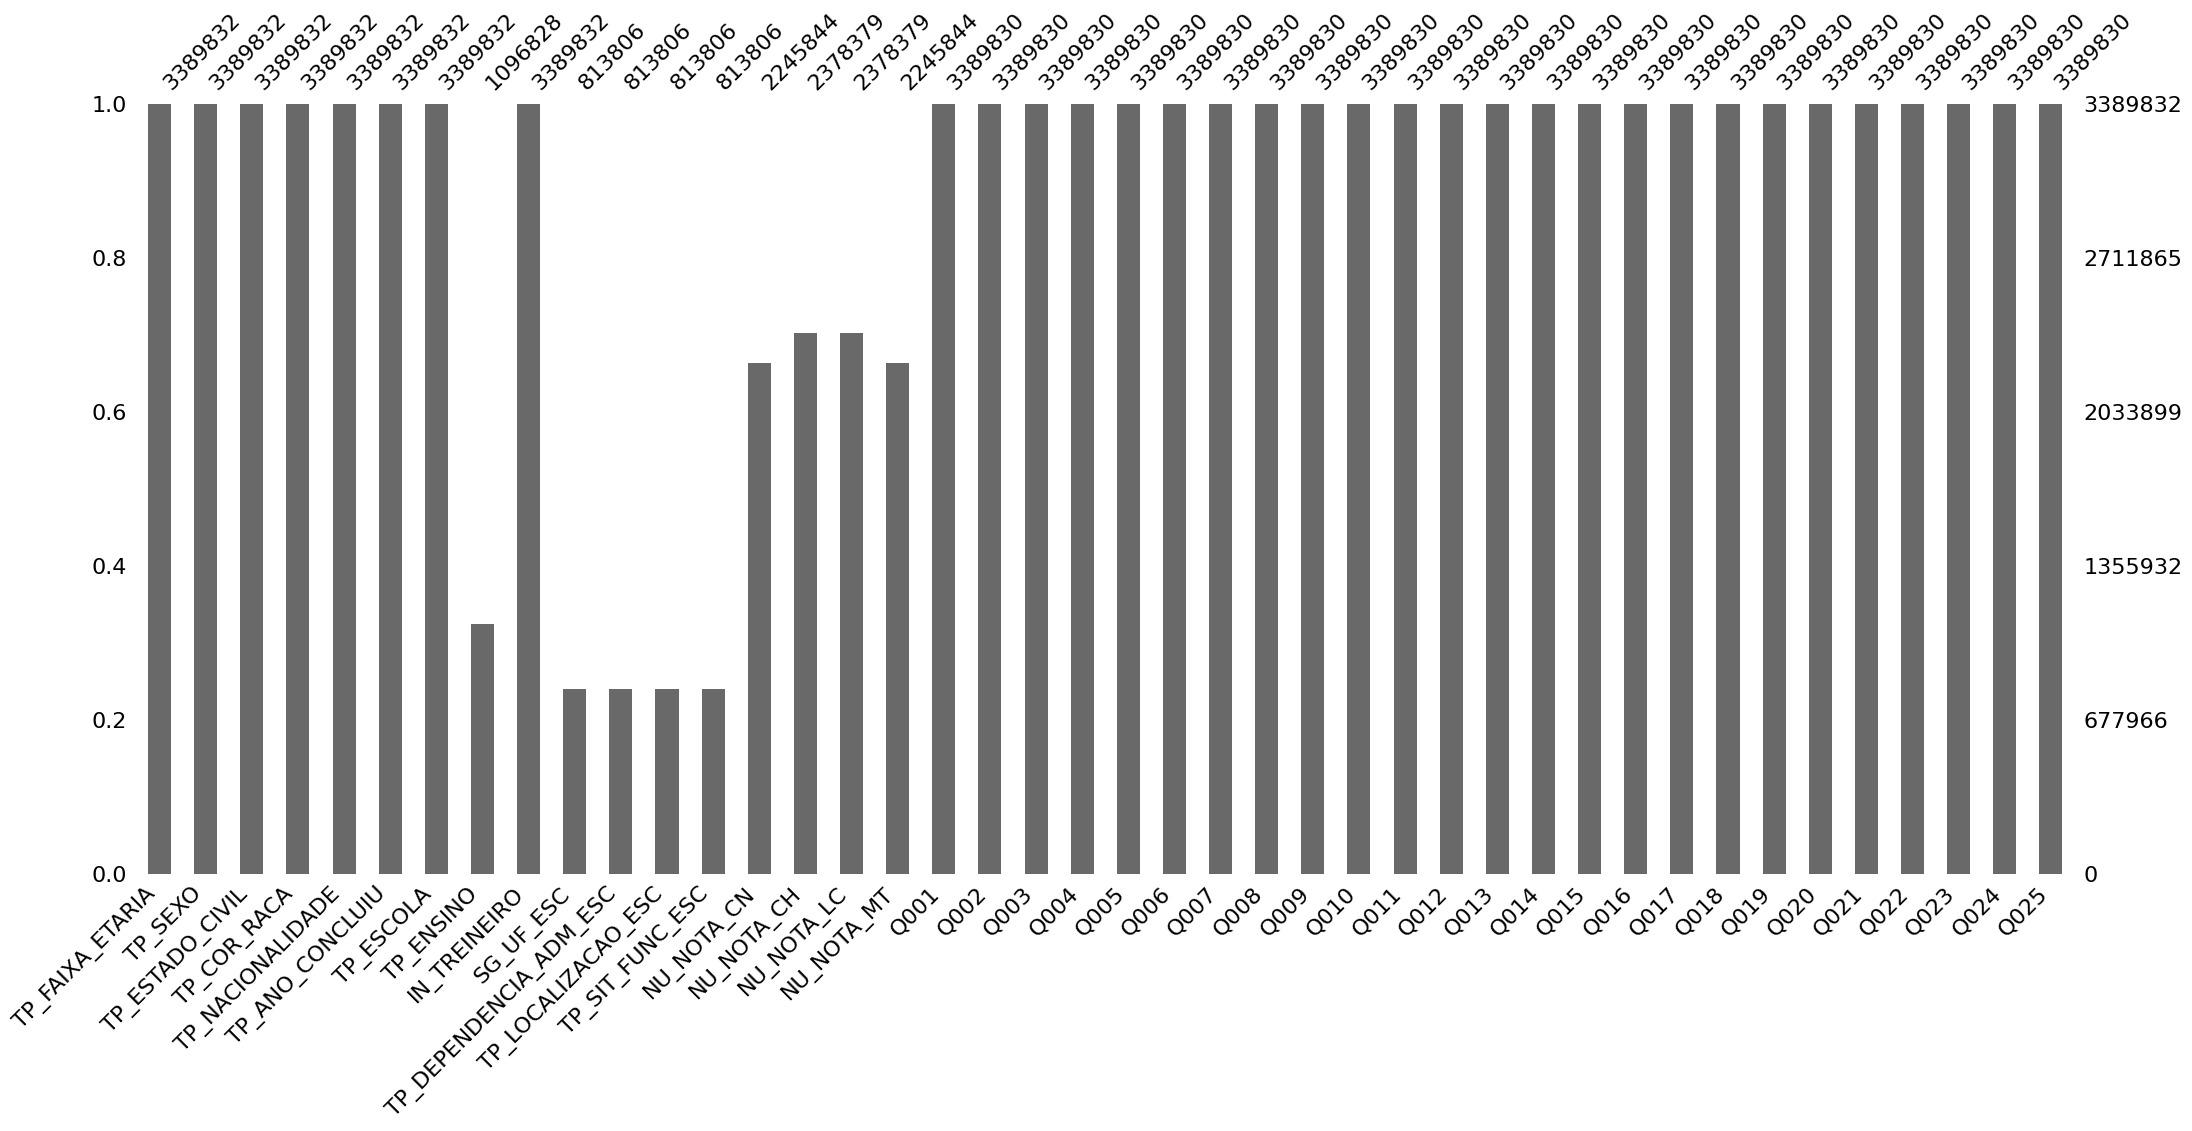

In [5]:
print('missing values')
msno.bar(df)


* muitos valores nulos sobre a região da escola > relevância dessas colunas?
* valores nulos sobre a nota da prova > exclusão de dados?

In [6]:
df.describe()

,TP_FAIXA_ETARIA,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,Q005
count,3.389832e+06,3.389832e+06,3.389832e+06,3.389832e+06,3.389832e+06,3.389832e+06,1.096828e+06,3.389832e+06,813806.000000,813806.000000,813806.000000,2.245844e+06,2.378379e+06,2.378379e+06,2.245844e+06,3.389830e+06
mean,5.306013e+00,1.052073e+00,2.043491e+00,1.027106e+00,2.581980e+00,1.396214e+00,1.006295e+00,1.289710e-01,2.469393,1.034867,1.015533,4.917857e+02,5.199434e+02,5.025556e+02,5.350802e+02,3.739557e+00
std,3.902871e+00,4.129414e-01,1.022561e+00,2.049293e-01,4.278731e+00,5.938455e-01,7.909361e-02,3.351679e-01,0.939162,0.183443,0.197323,8.056676e+01,9.579050e+01,7.916405e+01,1.106267e+02,1.378942e+00
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000,1.000000,1.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
25%,2.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,2.000000,1.000000,1.000000,4.310000e+02,4.454000e+02,4.476000e+02,4.447000e+02,3.000000e+00
50%,4.000000e+00,1.000000e+00,2.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,2.000000,1.000000,1.000000,4.820000e+02,5.219000e+02,5.059000e+02,5.154000e+02,4.000000e+00
75%,7.000000e+00,1.000000e+00,3.000000e+00,1.000000e+00,3.000000e+00,2.000000e+00,1.000000e+00,0.000000e+00,4.000000,1.000000,1.000000,5.458000e+02,5.893000e+02,5.588000e+02,6.139000e+02,4.000000e+00
max,2.000000e+01,4.000000e+00,6.000000e+00,4.000000e+00,1.500000e+01,3.000000e+00,2.000000e+00,1.000000e+00,4.000000,2.000000,4.000000,8.671000e+02,8.469000e+02,8.261000e+02,9.531000e+02,2.000000e+01


NU_NOTA_CN


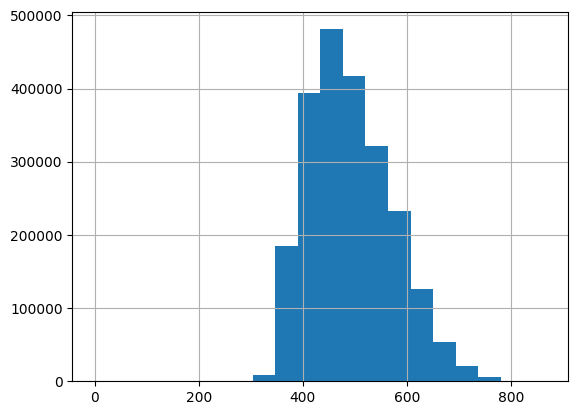

NU_NOTA_LC


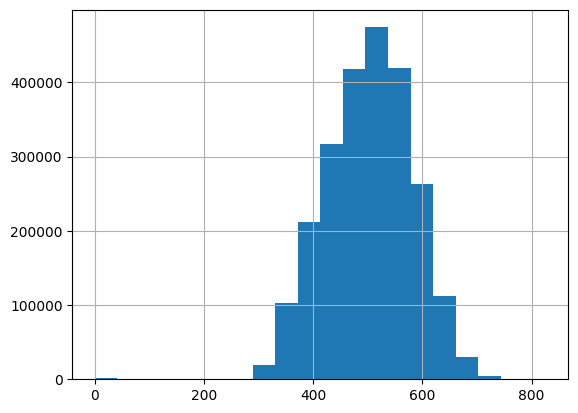

NU_NOTA_CH


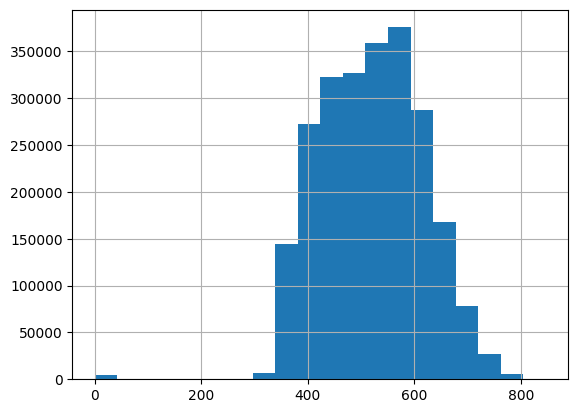

NU_NOTA_MT


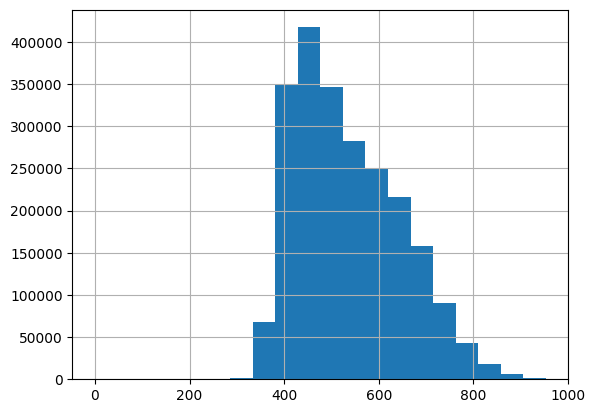

In [7]:
target_vars = ['NU_NOTA_CN','NU_NOTA_LC','NU_NOTA_CH','NU_NOTA_MT']

for var in target_vars:
    print(var)
    df[var].hist(bins=20)
    plt.show()

Q001


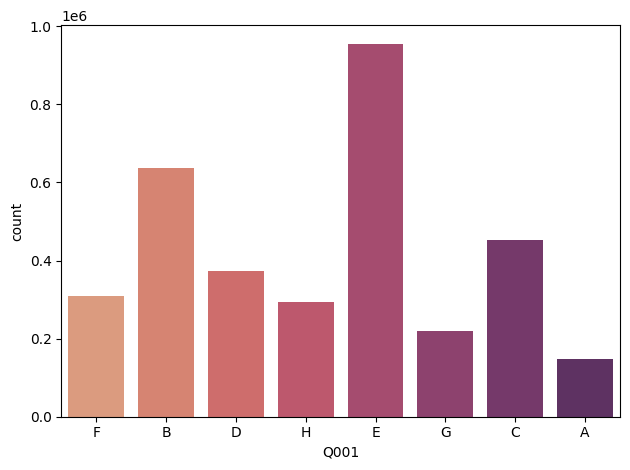

Q002


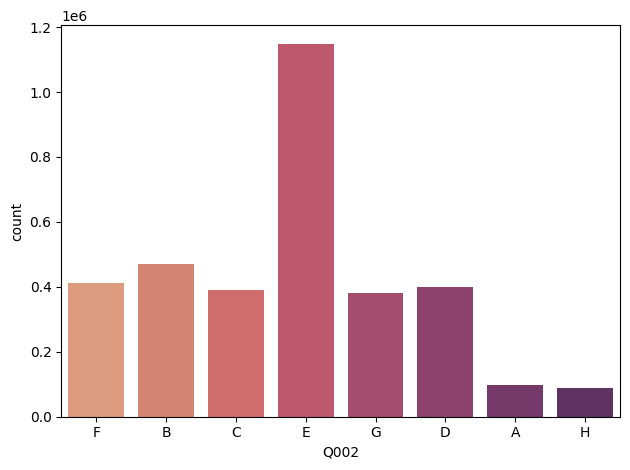

Q003


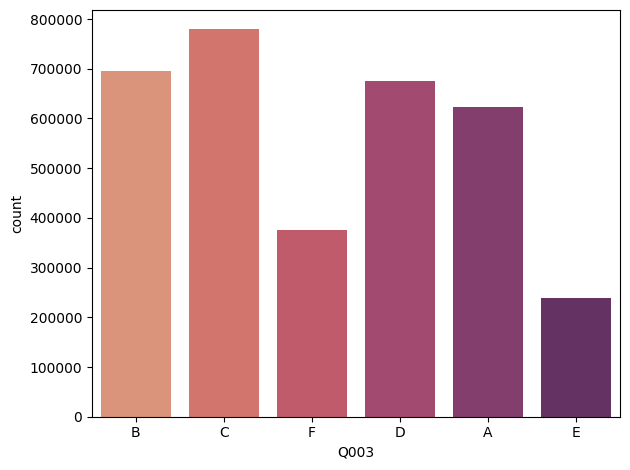

Q004


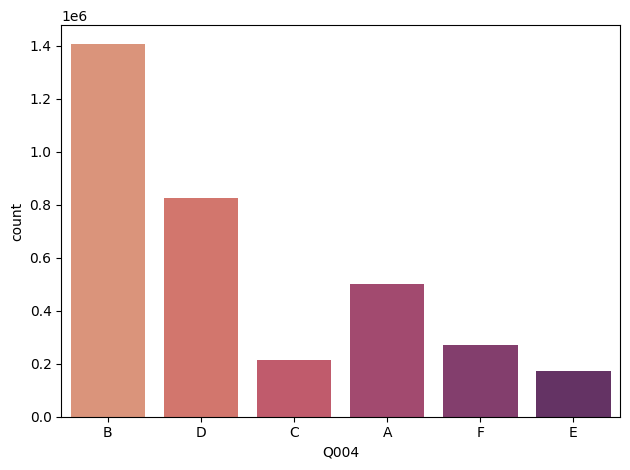

Q005


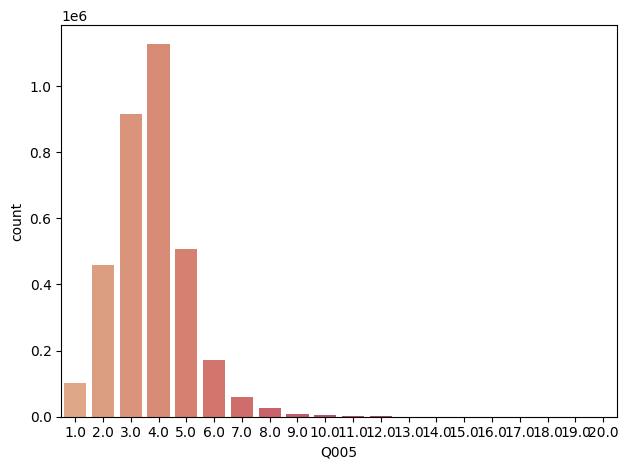

Q006


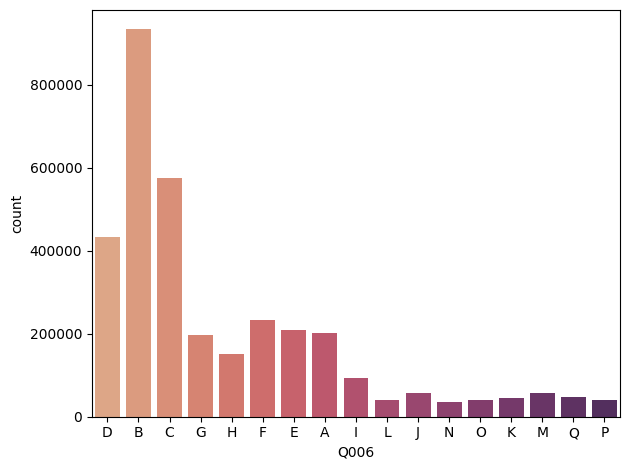

Q007


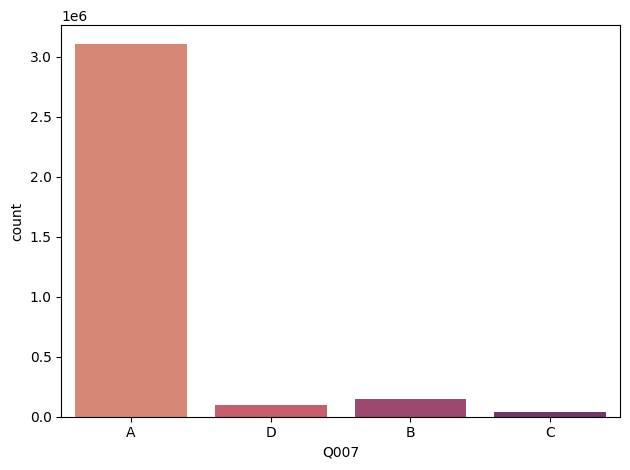

Q008


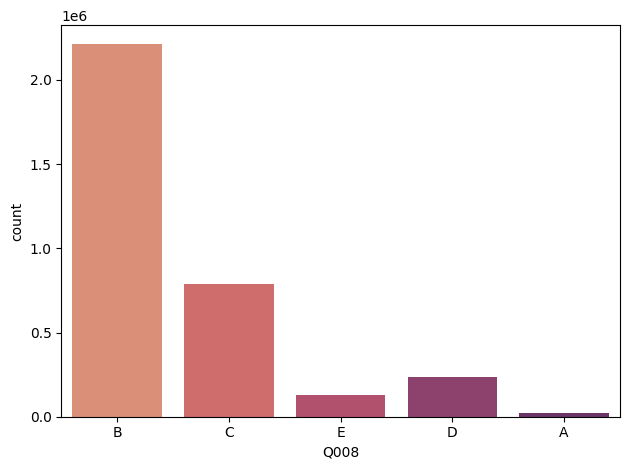

Q009


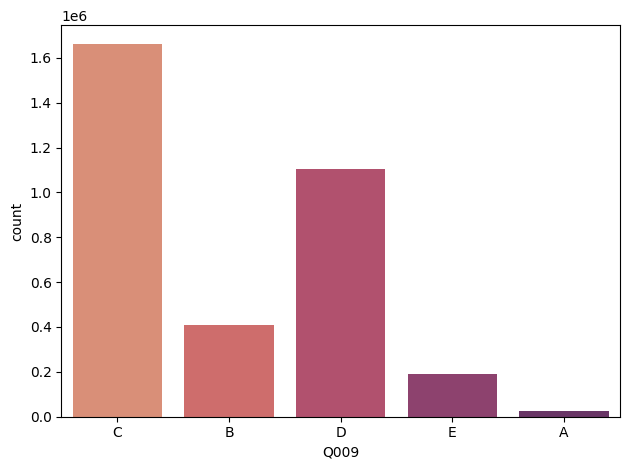

Q010


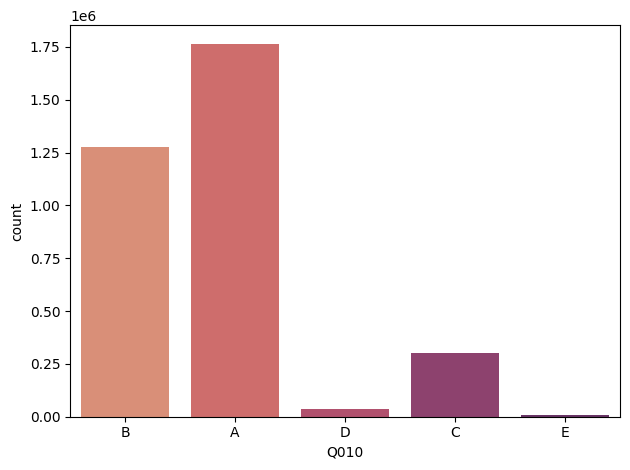

Q011


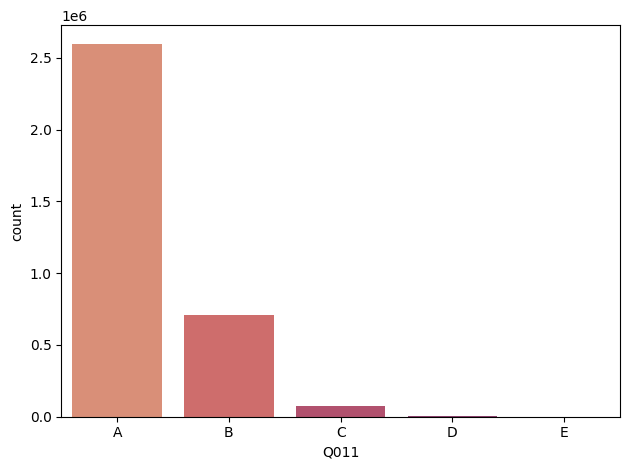

Q012


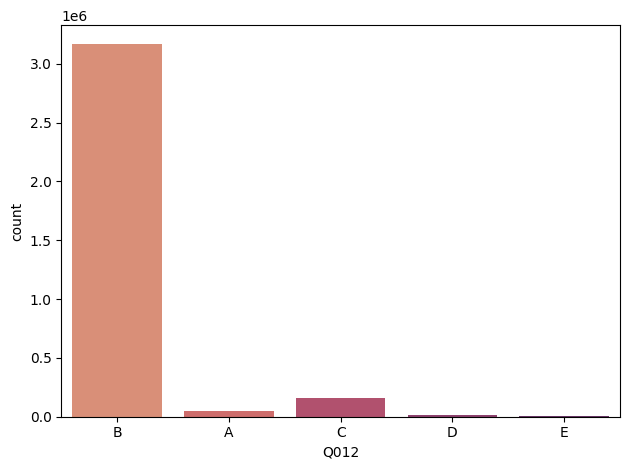

Q013


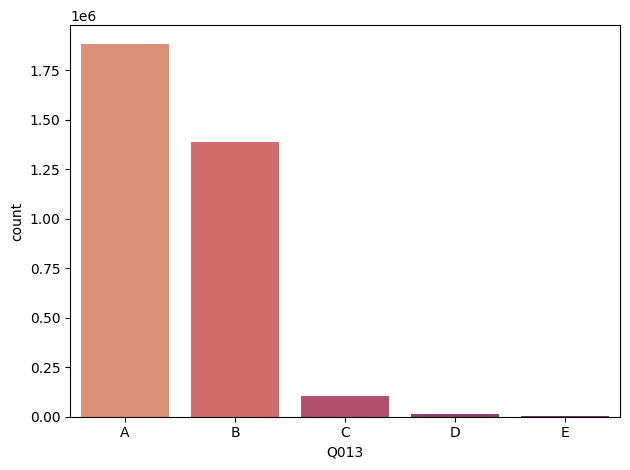

Q014


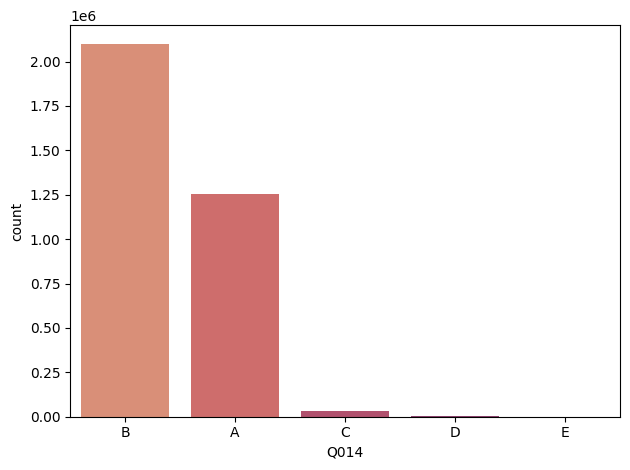

Q015


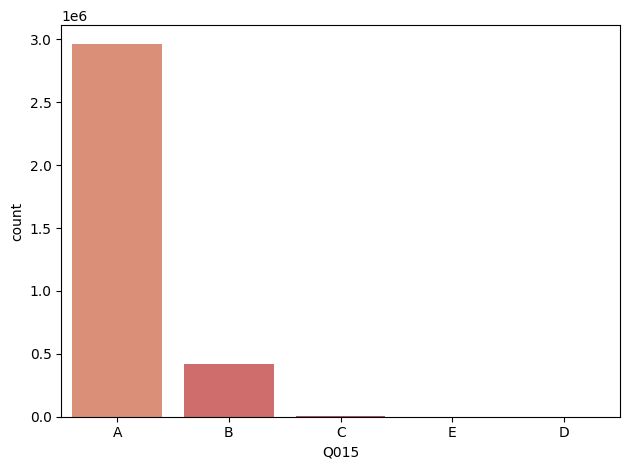

Q016


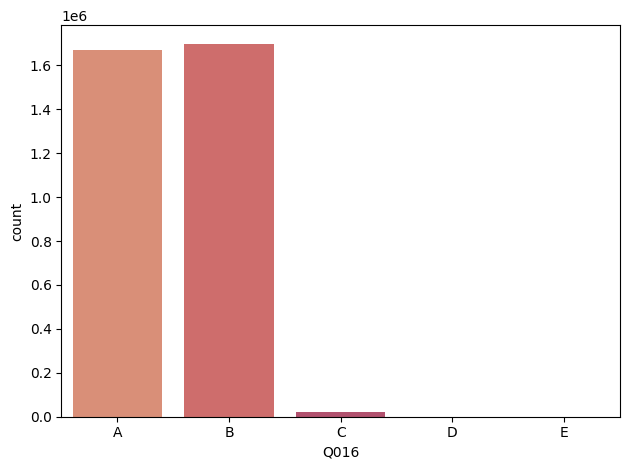

Q017


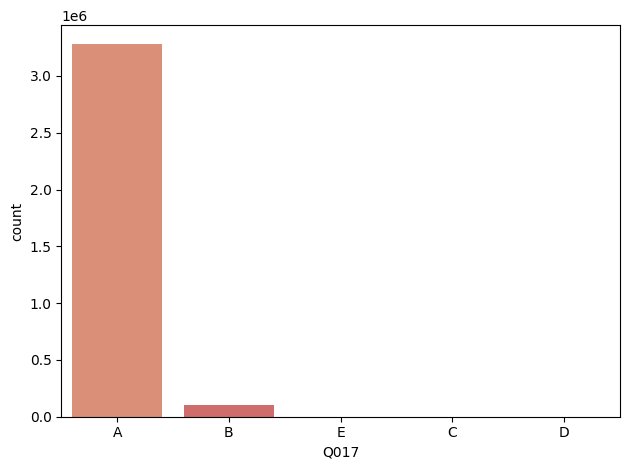

Q018


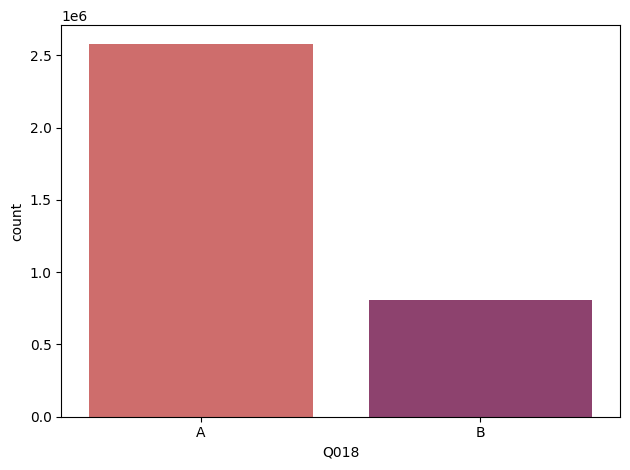

Q019


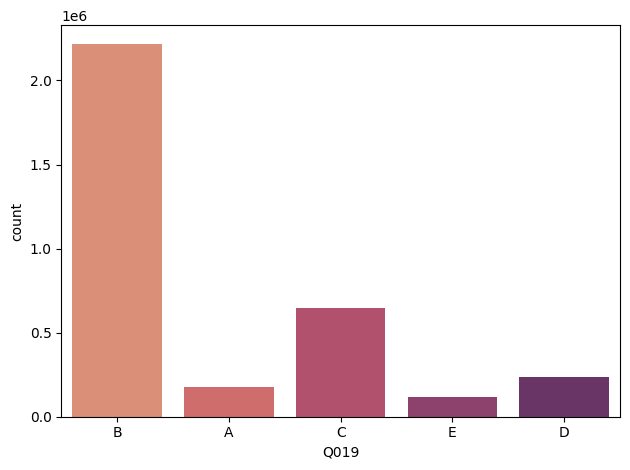

Q020


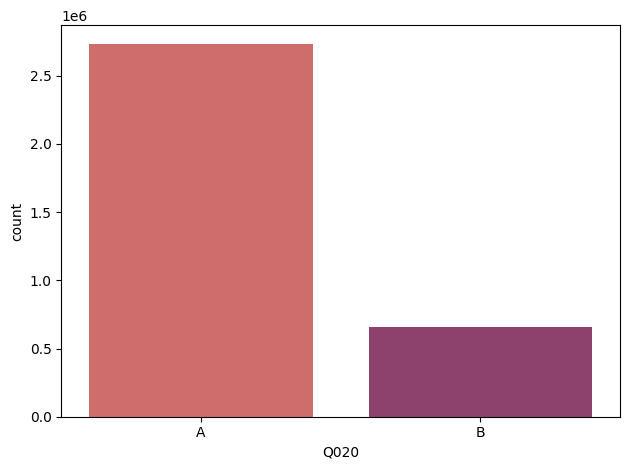

Q021


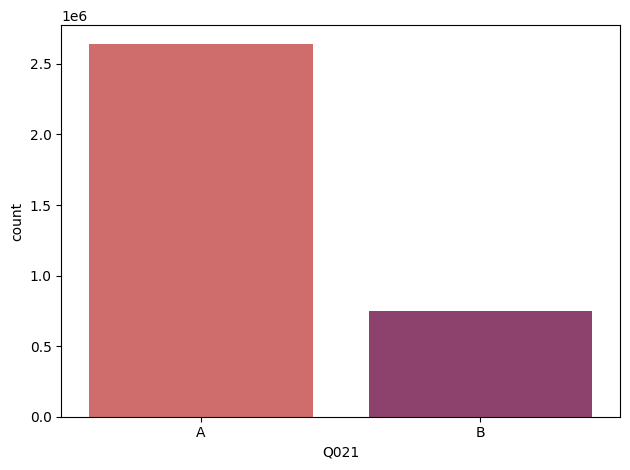

Q022


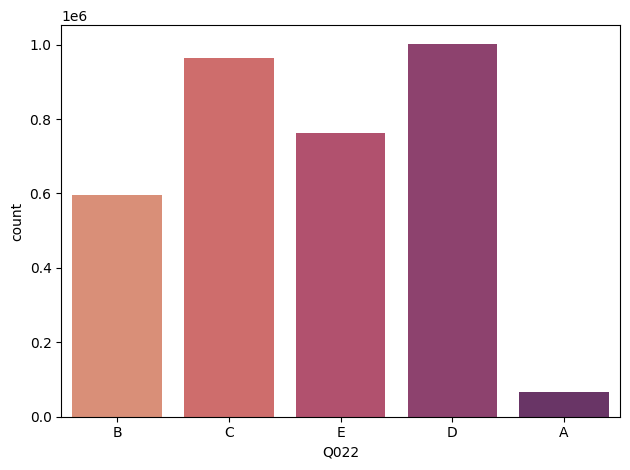

Q023


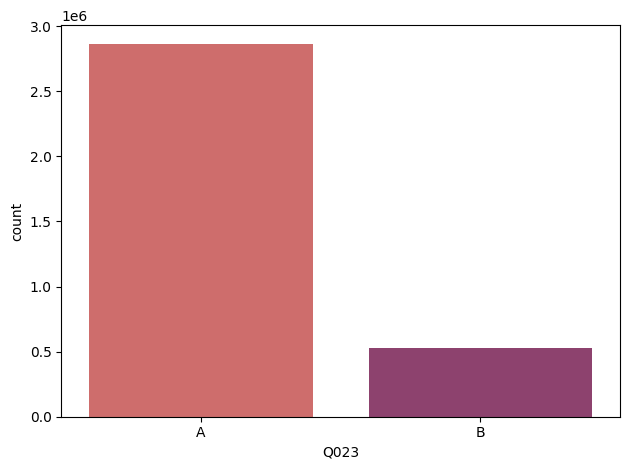

Q024


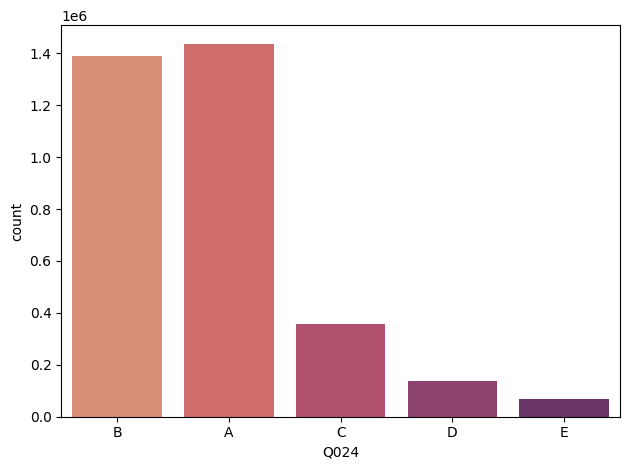

Q025


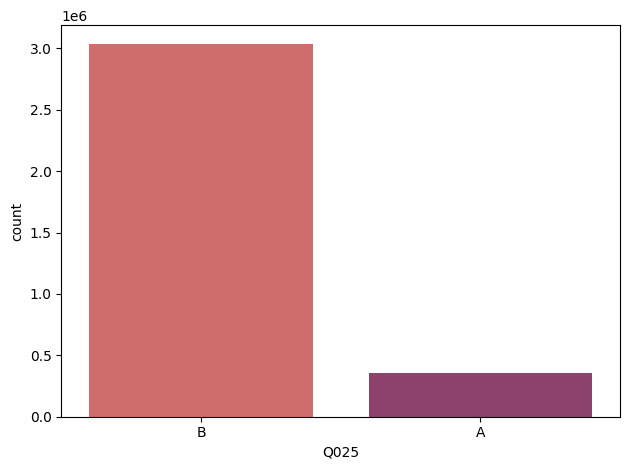

In [8]:
socio_questions_columns = [f'Q0{n}' if n >=10 else f'Q00{n}' for n in range(1,26)]
for socio_var in socio_questions_columns:
    print(socio_var)
    sns.countplot(x = df[socio_var], palette='flare')
    plt.tight_layout()
    plt.show()

#  <a name="tratamento">3. Tratamento</a>
[Voltar ao índice](#indice)

* eliminando variáveis desnecessárias para o estudo e/ou que apresentam grande quantidade de valores nulos.

In [9]:
df = df.drop(columns = ['TP_ENSINO', 'SG_UF_ESC','TP_DEPENDENCIA_ADM_ESC','TP_LOCALIZACAO_ESC','TP_SIT_FUNC_ESC'])
df

,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ANO_CONCLUIU,TP_ESCOLA,IN_TREINEIRO,NU_NOTA_CN,NU_NOTA_CH,...,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
0,5,F,1,1,1,3,1,0,NaN,574.6,...,A,A,A,B,A,A,B,A,B,B
1,12,M,1,1,1,11,1,0,505.9,551.8,...,A,A,A,B,A,A,C,A,A,A
2,13,F,3,1,1,15,1,0,NaN,NaN,...,B,A,A,B,A,A,C,B,B,B
3,3,M,1,3,1,0,2,0,580.7,678.9,...,A,A,A,B,A,A,B,A,B,B
4,2,F,1,3,1,0,2,0,497.7,532.4,...,B,A,A,B,A,B,E,A,B,B
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3389827,7,F,1,3,1,0,1,0,NaN,NaN,...,A,A,A,B,A,A,B,A,A,B
3389828,7,F,1,1,1,5,1,0,NaN,NaN,...,B,A,B,C,A,A,E,B,B,B
3389829,13,F,1,3,1,15,1,0,NaN,NaN,...,B,A,A,A,A,A,B,A,B,B
3389830,7,F,1,1,1,4,1,0,563.7,646.0,...,B,A,B,B,A,B,E,A,C,B


* Será que os valores nulos das notas de prova são valores que representam o 'zero' da prova? ou simplesmente a ausência destes dados por outras circunstâncias?
* verificarei se há valores '0' nas notas indicandoq que as provas zeradas diferem dos 'null valores'

In [10]:
for var in target_vars:
    print(var,'\n', df[df[var] == 0]['TP_SEXO'].count())


NU_NOTA_CN 
 393
NU_NOTA_LC 
 2248
NU_NOTA_CH 
 4632
NU_NOTA_MT 
 453


In [11]:
for var in target_vars:
    print(var,'\n', df[var].isnull().sum())


NU_NOTA_CN 
 1143988
NU_NOTA_LC 
 1011453
NU_NOTA_CH 
 1011453
NU_NOTA_MT 
 1143988


* podemos perceber que há valores nas notas das provas que foram zeradas (diferentes de null), o que significa ausência real destes valores.

* sendo assim optei pela exclusão dos dados faltantes nas nossas colunas de interesse
* eliminando uma única linha faltante nas features

In [12]:
df = df.dropna(subset=target_vars)
df = df.dropna(subset=socio_questions_columns)

In [13]:
def show_info(data):
    print('DATASET SHAPE: ', data.shape, '\n')
    print('-'*50)
    print('FEATURE DATA TYPES:')
    print(data.info())
    print('\n', '-'*50)
    print('NUMBER OF UNIQUE VALUES PER FEATURE:', '\n')
    print(data.nunique())
    print('\n', '-'*50)
    print('NULL VALUES PER FEATURE')
    print(data.isnull().sum())

show_info(df)

DATASET SHAPE:  (2238106, 37) 

--------------------------------------------------
FEATURE DATA TYPES:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 2238106 entries, 1 to 3389830
Data columns (total 37 columns):
 #   Column            Dtype  
---  ------            -----  
 0   TP_FAIXA_ETARIA   int64  
 1   TP_SEXO           object 
 2   TP_ESTADO_CIVIL   int64  
 3   TP_COR_RACA       int64  
 4   TP_NACIONALIDADE  int64  
 5   TP_ANO_CONCLUIU   int64  
 6   TP_ESCOLA         int64  
 7   IN_TREINEIRO      int64  
 8   NU_NOTA_CN        float64
 9   NU_NOTA_CH        float64
 10  NU_NOTA_LC        float64
 11  NU_NOTA_MT        float64
 12  Q001              object 
 13  Q002              object 
 14  Q003              object 
 15  Q004              object 
 16  Q005              float64
 17  Q006              object 
 18  Q007              object 
 19  Q008              object 
 20  Q009              object 
 21  Q010              object 
 22  Q011              object 
 23  Q012

#### Transformando var. quali em bool number

In [14]:
df = pd.get_dummies(df, columns=['TP_SEXO'], drop_first=True)
df.head()


,TP_FAIXA_ETARIA,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ANO_CONCLUIU,TP_ESCOLA,IN_TREINEIRO,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,...,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025,TP_SEXO_M
1,12,1,1,1,11,1,0,505.9,551.8,498.3,...,A,A,B,A,A,C,A,A,A,1
3,3,1,3,1,0,2,0,580.7,678.9,638.9,...,A,A,B,A,A,B,A,B,B,1
4,2,1,3,1,0,2,0,497.7,532.4,457.6,...,A,A,B,A,B,E,A,B,B,0
8,8,1,3,1,0,2,0,487.4,476.5,450.7,...,A,A,B,A,A,B,A,A,B,0
9,4,1,3,1,0,2,0,507.6,539.2,494.6,...,A,B,C,B,A,C,A,A,B,0


In [15]:
x = {
    'A': 0,
    'B': 1,
    'C': 2,
    'D': 3,
    'E': 4,
    'F': 5,
    'G': 6,
    'H': 7,
    'I': 8,
    'J': 9,
    'K': 10,
    'L': 11,
    'M': 12,
    'N': 13,
    'O': 14,
    'P': 15,
    'Q': 16
}
for socio_var in socio_questions_columns:
    if socio_var != 'Q005':
        df[socio_var] = df[socio_var].replace(x)

df.head()

,TP_FAIXA_ETARIA,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ANO_CONCLUIU,TP_ESCOLA,IN_TREINEIRO,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,...,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025,TP_SEXO_M
1,12,1,1,1,11,1,0,505.9,551.8,498.3,...,0,0,1,0,0,2,0,0,0,1
3,3,1,3,1,0,2,0,580.7,678.9,638.9,...,0,0,1,0,0,1,0,1,1,1
4,2,1,3,1,0,2,0,497.7,532.4,457.6,...,0,0,1,0,1,4,0,1,1,0
8,8,1,3,1,0,2,0,487.4,476.5,450.7,...,0,0,1,0,0,1,0,0,1,0
9,4,1,3,1,0,2,0,507.6,539.2,494.6,...,0,1,2,1,0,2,0,0,1,0


In [16]:
df["Q005"] = df["Q005"].astype(int)
df["TP_SEXO_M"] = df["TP_SEXO_M"].astype(int)

In [17]:
df[target_vars]

,NU_NOTA_CN,NU_NOTA_LC,NU_NOTA_CH,NU_NOTA_MT
1,505.9,498.3,551.8,461.5
3,580.7,638.9,678.9,659.5
4,497.7,457.6,532.4,582.6
8,487.4,450.7,476.5,493.4
9,507.6,494.6,539.2,413.3
...,...,...,...,...
3389793,506.0,416.3,405.2,450.4
3389807,435.6,534.7,531.2,399.2
3389814,576.9,631.0,605.6,678.0
3389815,449.9,466.3,368.2,370.0


#  <a name="corr">4. Correlação e associação</a>
[Voltar ao índice](#indice)

#### Neste primeiro momento usaremos a média de todas as notas de provas para análise e treinamento do modelo para uma idéia geral e somente dados de participantes não treineiros

In [18]:
df = df[df['IN_TREINEIRO'] == 0]
df

,TP_FAIXA_ETARIA,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ANO_CONCLUIU,TP_ESCOLA,IN_TREINEIRO,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,...,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025,TP_SEXO_M
1,12,1,1,1,11,1,0,505.9,551.8,498.3,...,0,0,1,0,0,2,0,0,0,1
3,3,1,3,1,0,2,0,580.7,678.9,638.9,...,0,0,1,0,0,1,0,1,1,1
4,2,1,3,1,0,2,0,497.7,532.4,457.6,...,0,0,1,0,1,4,0,1,1,0
8,8,1,3,1,0,2,0,487.4,476.5,450.7,...,0,0,1,0,0,1,0,0,1,0
9,4,1,3,1,0,2,0,507.6,539.2,494.6,...,0,1,2,1,0,2,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3389793,15,1,1,1,0,1,0,506.0,405.2,416.3,...,0,0,1,0,0,3,0,1,1,0
3389807,14,2,3,1,15,1,0,435.6,531.2,534.7,...,0,0,1,1,0,2,1,1,1,1
3389814,10,1,1,1,8,1,0,576.9,605.6,631.0,...,0,1,1,0,1,3,1,2,1,1
3389815,5,1,3,1,1,1,0,449.9,368.2,466.3,...,0,0,1,0,0,2,0,0,1,0


In [19]:
df['NOTA_MEDIA'] = df.loc[:, ["NU_NOTA_CN","NU_NOTA_CH","NU_NOTA_LC", "NU_NOTA_MT"]].mean(axis = 1)
df['NOTA_MEDIA']

1          504.375
3          639.500
4          517.575
8          477.000
9          488.675
            ...   
3389793    444.475
3389807    475.175
3389814    622.875
3389815    413.600
3389830    616.700
Name: NOTA_MEDIA, Length: 1870733, dtype: float64

Q001


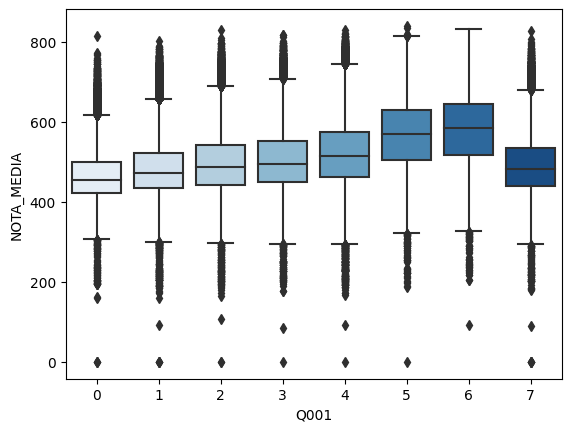

Q002


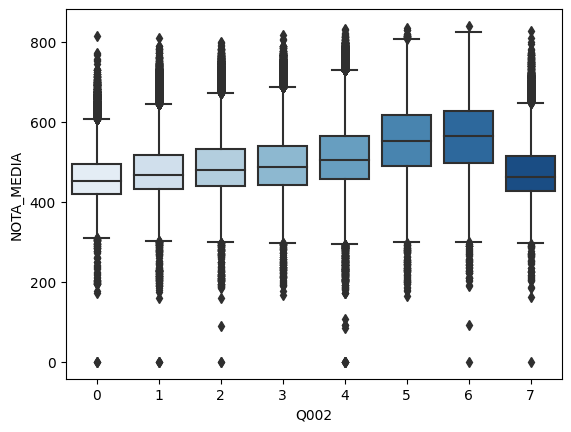

Q003


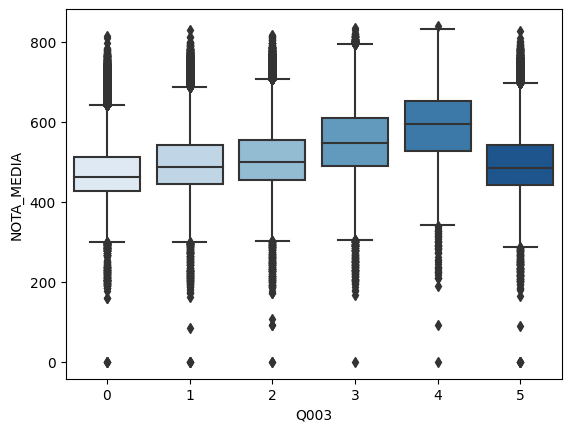

Q004


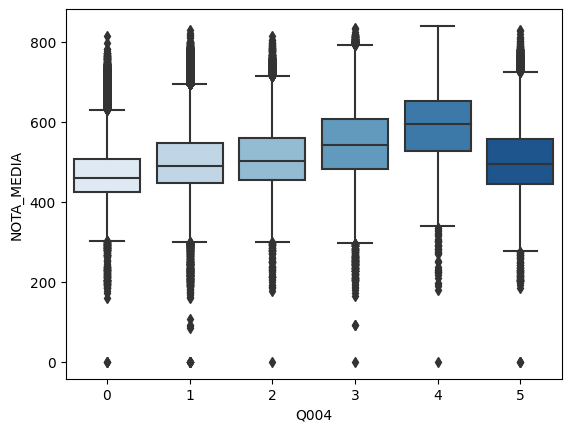

Q005


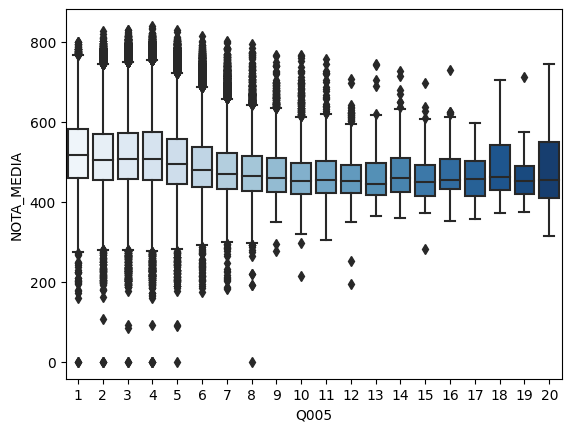

Q006


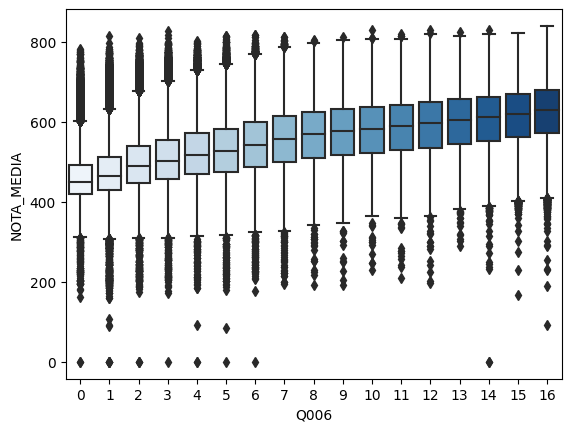

Q007


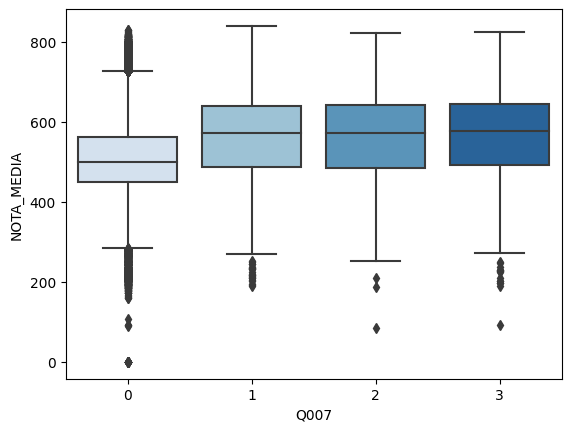

Q008


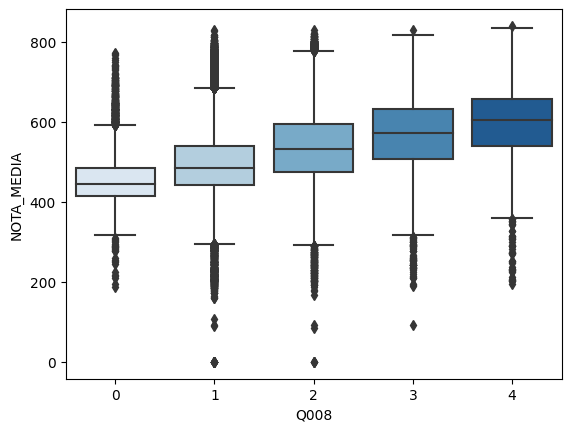

Q009


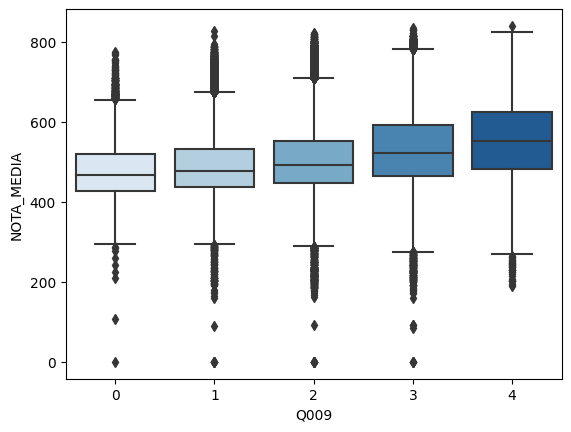

Q010


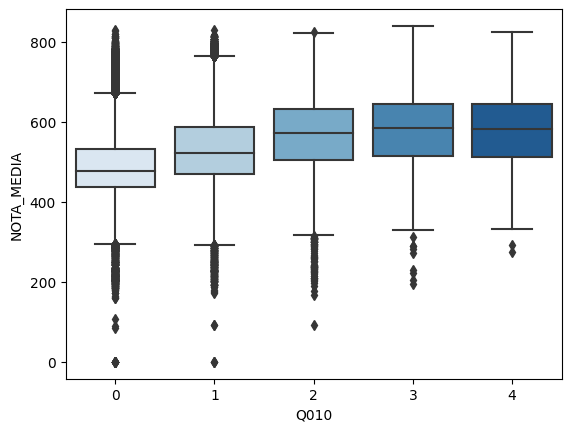

Q011


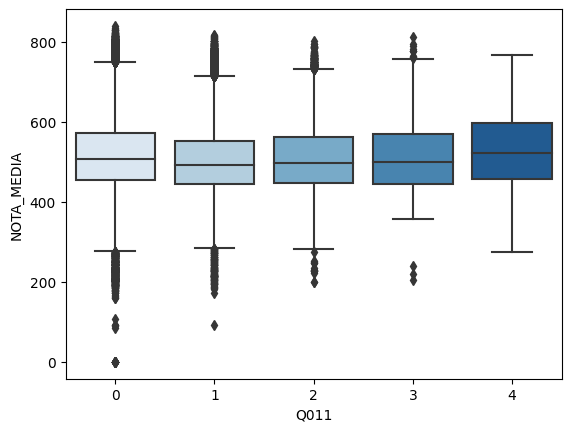

Q012


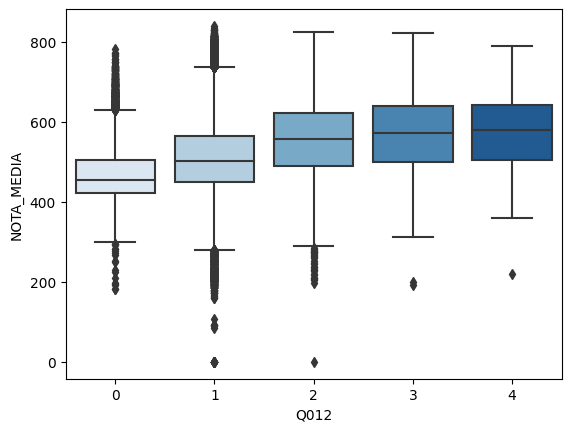

Q013


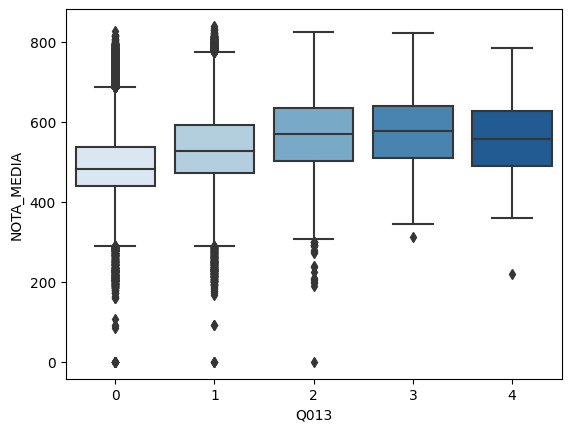

Q014


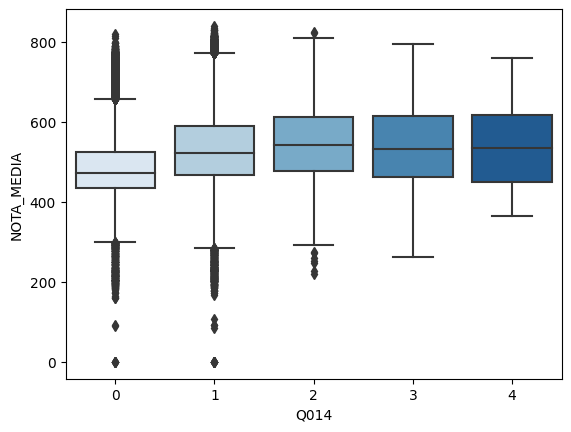

Q015


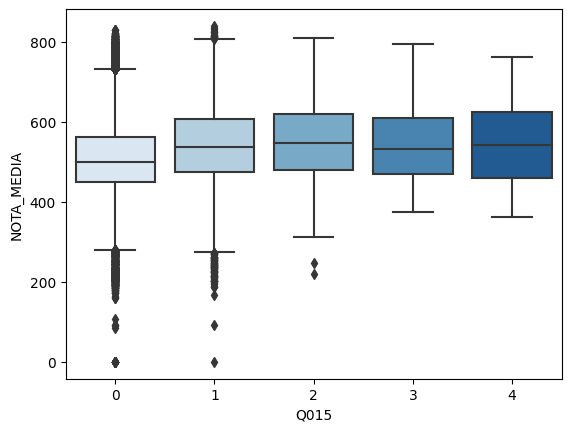

Q016


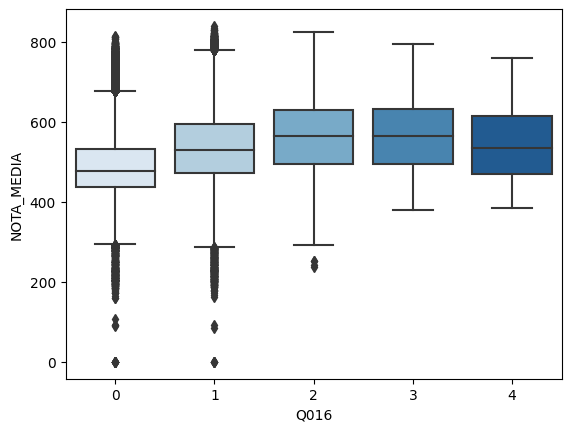

Q017


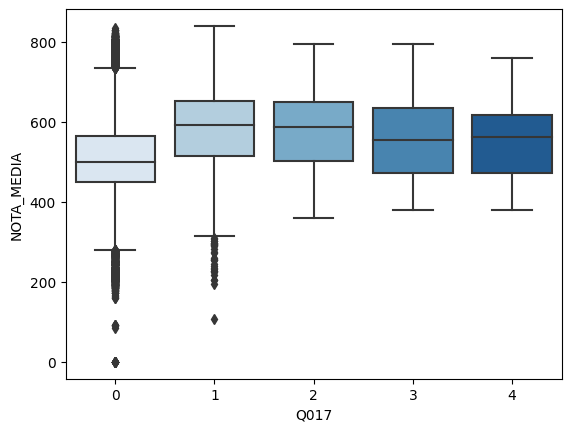

Q018


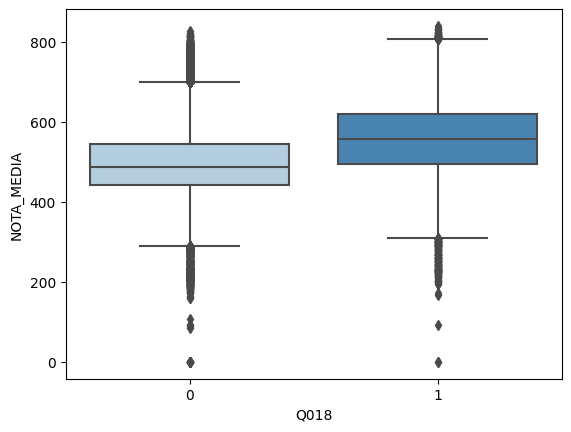

Q019


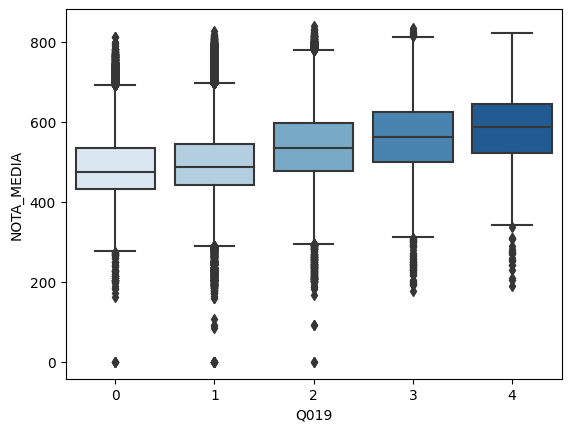

Q020


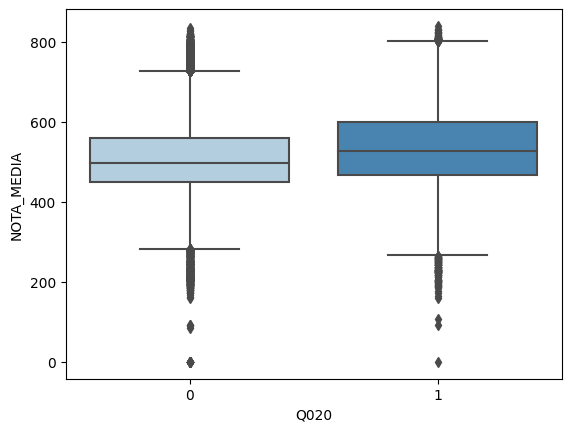

Q021


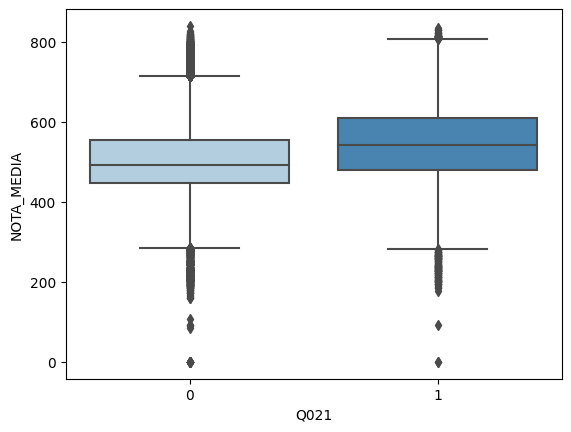

Q022


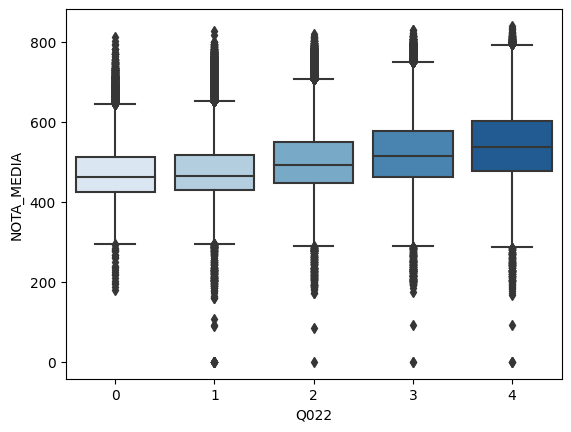

Q023


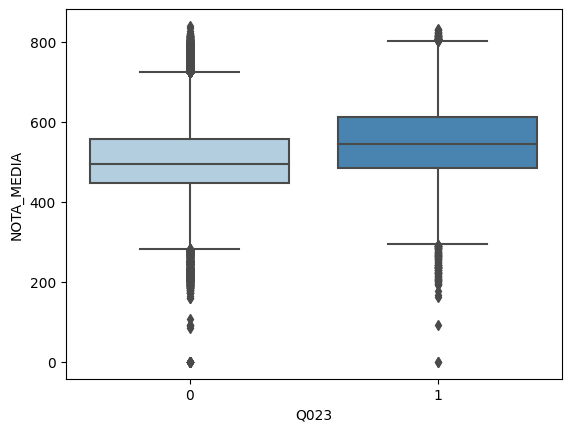

Q024


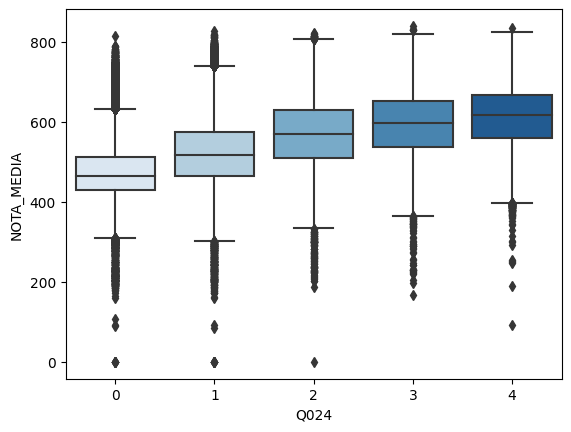

Q025


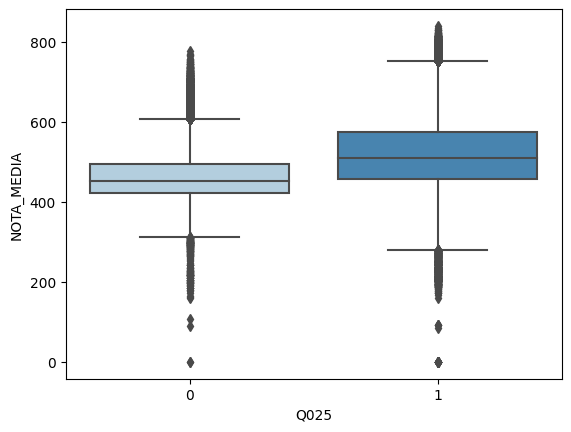

In [20]:
for socio_var in socio_questions_columns:
    print(socio_var)
    sns.boxplot(y=df['NOTA_MEDIA'], x=socio_var, data=df, palette='Blues')
    plt.show()


In [21]:
def show_info(data):
    print('DATASET SHAPE: ', data.shape, '\n')
    print('-'*50)
    print('FEATURE DATA TYPES:')
    print(data.info())
    print('\n', '-'*50)
    print('NUMBER OF UNIQUE VALUES PER FEATURE:', '\n')
    print(data.nunique())
    print('\n', '-'*50)
    print('NULL VALUES PER FEATURE')
    print(data.isnull().sum())

show_info(df)

DATASET SHAPE:  (1870733, 38) 

--------------------------------------------------
FEATURE DATA TYPES:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1870733 entries, 1 to 3389830
Data columns (total 38 columns):
 #   Column            Dtype  
---  ------            -----  
 0   TP_FAIXA_ETARIA   int64  
 1   TP_ESTADO_CIVIL   int64  
 2   TP_COR_RACA       int64  
 3   TP_NACIONALIDADE  int64  
 4   TP_ANO_CONCLUIU   int64  
 5   TP_ESCOLA         int64  
 6   IN_TREINEIRO      int64  
 7   NU_NOTA_CN        float64
 8   NU_NOTA_CH        float64
 9   NU_NOTA_LC        float64
 10  NU_NOTA_MT        float64
 11  Q001              int64  
 12  Q002              int64  
 13  Q003              int64  
 14  Q004              int64  
 15  Q005              int64  
 16  Q006              int64  
 17  Q007              int64  
 18  Q008              int64  
 19  Q009              int64  
 20  Q010              int64  
 21  Q011              int64  
 22  Q012              int64  
 23  Q013

In [22]:
t_columns = ['NOTA_MEDIA'] + socio_questions_columns
df_notas_q = df[t_columns]

<Axes: title={'center': 'Correlação entre as variáveis'}>

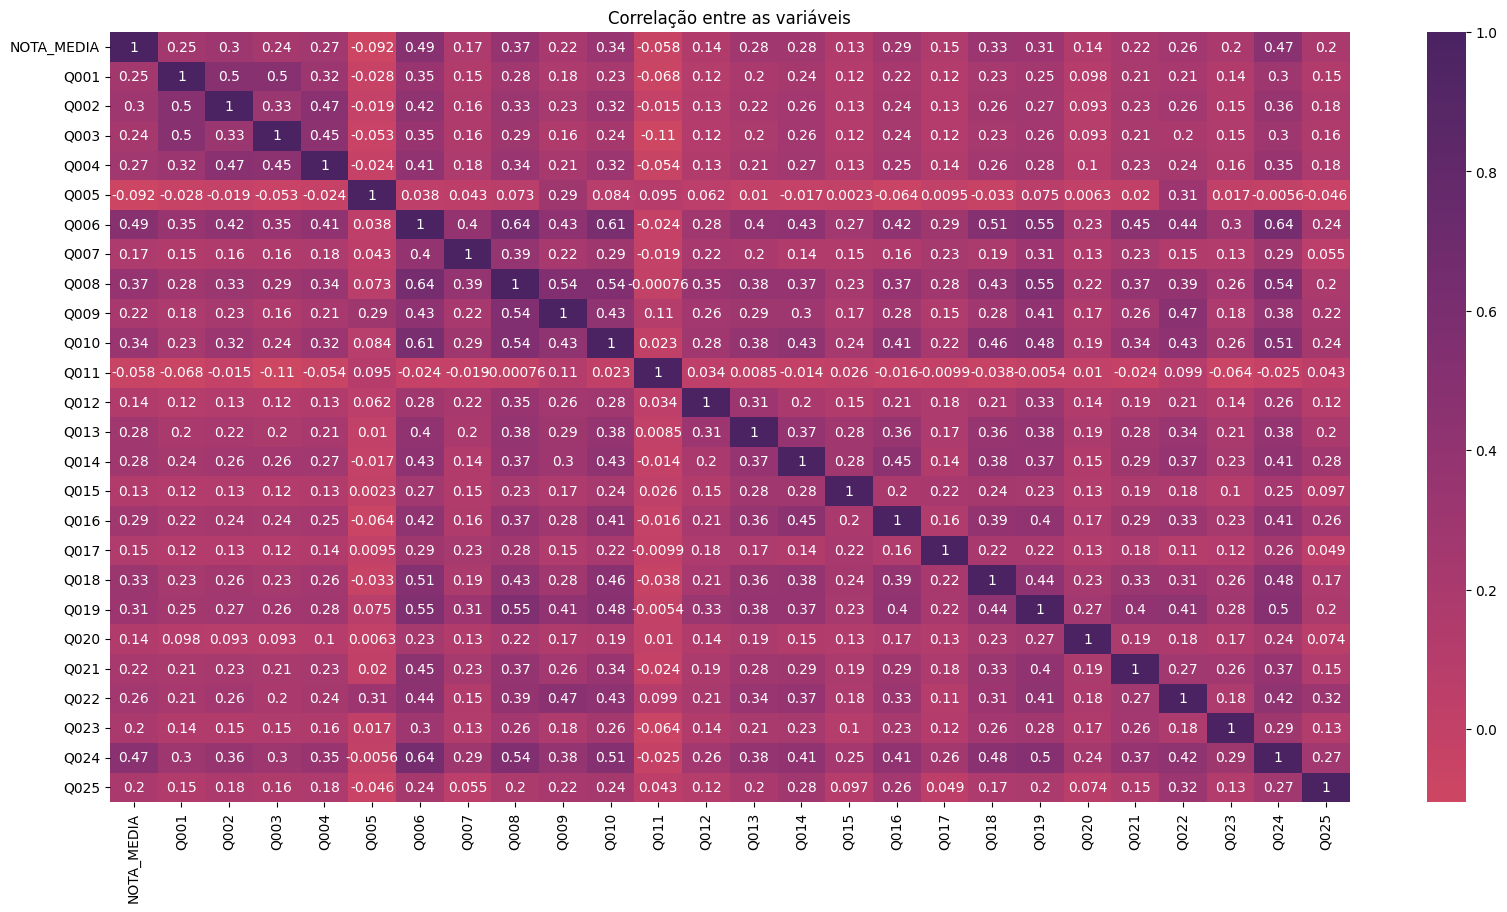

In [23]:
plt.figure(figsize=(20,10))
plt.title('Correlação entre as variáveis')
sns.heatmap(df_notas_q.corr(),cmap='flare', center=0, annot=True)


* percebe-se menor correlaçãod as questões 11 e 5 com a média das notas.

plt.figure(figsize=(15,7))
sns.pairplot(df_notas_q, hue='NOTA_MEDIA')
plt.show()


#  <a name="modelo">5. Treinamento do modelo</a>
[Voltar ao índice](#indice)

In [24]:
X_train, X_val, y_train, y_val = train_test_split(df_notas_q.drop(columns=['NOTA_MEDIA']),df_notas_q['NOTA_MEDIA'], train_size = 0.7, random_state=3)

In [25]:
def model_metrics(y_test,y_pred, model_name=None):
  return {
      'Model': model_name,
      'R2': r2_score(y_test, y_pred),
      'MAE': mean_absolute_error(y_test,y_pred),
      'MSE': mean_squared_error(y_test, y_pred),
      'RMSE': np.sqrt(mean_squared_error(y_test, y_pred))
  }


In [26]:
from sklearn.inspection import permutation_importance

def permut_importance(model, X, y, repetitions=30):
  scoring = ['r2', 'neg_mean_absolute_error', 'neg_root_mean_squared_error']
  r_multi = permutation_importance(model, X, y, n_repeats=repetitions, random_state=0, scoring=scoring)
  data = {}
  for metric in r_multi:
    data[f'{str(metric)}'] = {'Features': [], 'Mean': []}
    r = r_multi[metric]
    for i in r.importances_mean.argsort()[::-1]:
      if r.importances_mean[i] - 2 * r.importances_std[i] > 0:
        data[f'{str(metric)}']['Features'].append(f'{socio_questions_columns[i]:<4}')
        data[f'{str(metric)}']['Mean'].append(f'{r.importances_mean[i]:.3f}')
  return data


### Linear Reg com sklearn

In [27]:
from sklearn.linear_model import LinearRegression
linear_reg = LinearRegression().fit(X_train, y_train)
y_pred = linear_reg.predict(X_val)

In [28]:
linear_metrics = model_metrics(y_val, y_pred, model_name='Linear')
linear_metrics

{'Model': 'Linear',
 'R2': 0.3097888921151478,
 'MAE': 53.38566579506064,
 'MSE': 4461.351238284269,
 'RMSE': 66.79334726066863}

In [29]:
linear_perm_data = permut_importance(linear_reg, X_val,y_val)
linear_perm_data

{'r2': {'Features': ['Q006',
   'Q024',
   'Q005',
   'Q002',
   'Q013',
   'Q008',
   'Q021',
   'Q022',
   'Q025',
   'Q011',
   'Q018',
   'Q012',
   'Q015',
   'Q007',
   'Q023',
   'Q001',
   'Q016',
   'Q003',
   'Q009',
   'Q019',
   'Q004',
   'Q017',
   'Q020',
   'Q010'],
  'Mean': ['0.145',
   '0.087',
   '0.019',
   '0.008',
   '0.007',
   '0.005',
   '0.004',
   '0.003',
   '0.003',
   '0.002',
   '0.002',
   '0.002',
   '0.002',
   '0.002',
   '0.001',
   '0.001',
   '0.001',
   '0.001',
   '0.000',
   '0.000',
   '0.000',
   '0.000',
   '0.000',
   '0.000']},
 'neg_mean_absolute_error': {'Features': ['Q006',
   'Q024',
   'Q005',
   'Q002',
   'Q013',
   'Q008',
   'Q022',
   'Q018',
   'Q025',
   'Q011',
   'Q001',
   'Q023',
   'Q016',
   'Q021',
   'Q003',
   'Q015',
   'Q012',
   'Q004',
   'Q007',
   'Q010'],
  'Mean': ['5.804',
   '3.746',
   '0.727',
   '0.425',
   '0.379',
   '0.326',
   '0.202',
   '0.166',
   '0.162',
   '0.100',
   '0.076',
   '0.070',
   '0.0

### Random Forest Reg

In [30]:
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.model_selection import GridSearchCV
# max_leaf_nodes = [4,8,16,32,64,128]
# params = {'max_leaf_nodes' : max_leaf_nodes, 'max_depth': [7]}
# scoring = 'neg_root_mean_squared_error'
# rf1 = RandomForestRegressor()
# rf_cv = GridSearchCV(rf1, params,scoring=scoring, n_jobs=-1, verbose=2)
# rf_cv.fit(X_train, y_train)
# y_pred = rf_cv.predict(X_val)
# print(rf_cv.best_params_)
# print(rf_cv.cv_results_ )

In [31]:
# y = rf_cv.cv_results_['mean_test_score']
# x = [n['max_depth'] for n in rf_cv.cv_results_['params']]
# x2 = [n['max_leaf_nodes'] for n in rf_cv.cv_results_['params']]

# fig = plt.figure(figsize=(10,10))
# ax = fig.add_subplot(projection='3d')
# ax.scatter(x, x2, y, label='teste')
# ax.set_xlabel('max_depth')
# ax.set_ylabel('leaf_nodes')
# ax.set_zlabel('RMSE')
# fig.show()

In [32]:
from sklearn.ensemble import RandomForestRegressor
rf1 = RandomForestRegressor(max_depth = 7, random_state = 18).fit(X_train, y_train)
y_pred = rf1.predict(X_val)

In [33]:
rf_metrics = model_metrics(y_val, y_pred, model_name='Random Forest')
rf_metrics

{'Model': 'Random Forest',
 'R2': 0.3114816281751195,
 'MAE': 53.32680158965975,
 'MSE': 4450.4098175638965,
 'RMSE': 66.71139196242196}

In [34]:
rf_perm_data = permut_importance(rf1, X_val,y_val, repetitions=1)
rf_perm_data

{'r2': {'Features': ['Q006',
   'Q024',
   'Q005',
   'Q002',
   'Q003',
   'Q001',
   'Q013',
   'Q022',
   'Q007',
   'Q011',
   'Q004',
   'Q021',
   'Q018',
   'Q010',
   'Q015',
   'Q008',
   'Q019',
   'Q009',
   'Q016',
   'Q012',
   'Q025',
   'Q017',
   'Q023'],
  'Mean': ['0.169',
   '0.112',
   '0.016',
   '0.010',
   '0.008',
   '0.004',
   '0.002',
   '0.002',
   '0.000',
   '0.000',
   '0.000',
   '0.000',
   '0.000',
   '0.000',
   '0.000',
   '0.000',
   '0.000',
   '0.000',
   '0.000',
   '0.000',
   '0.000',
   '0.000',
   '0.000']},
 'neg_mean_absolute_error': {'Features': ['Q006',
   'Q024',
   'Q005',
   'Q002',
   'Q003',
   'Q001',
   'Q022',
   'Q013',
   'Q007',
   'Q011',
   'Q004',
   'Q010',
   'Q018',
   'Q021',
   'Q015',
   'Q008',
   'Q016',
   'Q020',
   'Q023',
   'Q025'],
  'Mean': ['6.736',
   '4.761',
   '0.520',
   '0.469',
   '0.355',
   '0.201',
   '0.120',
   '0.111',
   '0.017',
   '0.010',
   '0.010',
   '0.002',
   '0.002',
   '0.001',
   '0.

rf2 = RandomForestRegressor(n_estimators = 300, max_features = 'sqrt', max_depth = 5, random_state = 18).fit(train.drop(columns=['NOTA_MEDIA']), train['NOTA_MEDIA'])

In [35]:
import tensorflow as tf
from tensorflow.keras import *

regressor = Sequential()
regressor.add(layers.Dense(units= 25, activation= 'relu', input_shape= [25]))
regressor.add(layers.Dense(units= 100, activation= 'relu'))
regressor.add(layers.Dense(units= 25, activation= 'relu'))
regressor.add(layers.Dense(units= 1, activation= 'linear'))
regressor.compile(optimizer= 'adam', loss= 'mse', metrics= ['mse'])
regressor.fit(X_train, y_train, batch_size= 5, epochs= 5)
y_pred = regressor.predict(X_val)

Epoch 1/5
261903/261903 [==============================] - 493s 2ms/step - loss: 4633.4502 - mse: 4633.4502
Epoch 2/5
261903/261903 [==============================] - 475s 2ms/step - loss: 4397.9019 - mse: 4397.9019
Epoch 3/5
261903/261903 [==============================] - 475s 2ms/step - loss: 4385.6177 - mse: 4385.6177
Epoch 4/5
261903/261903 [==============================] - 480s 2ms/step - loss: 4379.1172 - mse: 4379.1172
Epoch 5/5
17539/17539 [==============================] - 23s 1ms/step


In [36]:
rna_metrics = model_metrics(y_val, y_pred, model_name='RNA')
rna_metrics

{'Model': 'RNA',
 'R2': 0.3275452308092546,
 'MAE': 52.63808712442399,
 'MSE': 4346.578724896142,
 'RMSE': 65.92858806994234}

In [37]:
rna_perm_data = permut_importance(regressor, X_val,y_val, repetitions=1)
rna_perm_data

17539/17539 [==============================] - 23s 1ms/step


{'r2': {'Features': ['Q006',
   'Q024',
   'Q005',
   'Q002',
   'Q003',
   'Q013',
   'Q021',
   'Q022',
   'Q008',
   'Q011',
   'Q007',
   'Q001',
   'Q019',
   'Q018',
   'Q012',
   'Q015',
   'Q025',
   'Q009',
   'Q023',
   'Q010',
   'Q014',
   'Q004',
   'Q016',
   'Q017',
   'Q020'],
  'Mean': ['0.132',
   '0.094',
   '0.024',
   '0.013',
   '0.010',
   '0.006',
   '0.004',
   '0.004',
   '0.004',
   '0.003',
   '0.003',
   '0.002',
   '0.002',
   '0.002',
   '0.002',
   '0.001',
   '0.001',
   '0.001',
   '0.001',
   '0.001',
   '0.001',
   '0.000',
   '0.000',
   '0.000',
   '0.000']},
 'neg_mean_absolute_error': {'Features': ['Q006',
   'Q024',
   'Q005',
   'Q002',
   'Q003',
   'Q013',
   'Q008',
   'Q022',
   'Q018',
   'Q019',
   'Q001',
   'Q011',
   'Q007',
   'Q021',
   'Q025',
   'Q023',
   'Q012',
   'Q010',
   'Q015',
   'Q016',
   'Q017',
   'Q009'],
  'Mean': ['5.548',
   '4.100',
   '0.853',
   '0.598',
   '0.478',
   '0.330',
   '0.237',
   '0.217',
   '0.151'

In [38]:
regressor.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 25)                650       
                                                                 
 dense_1 (Dense)             (None, 100)               2600      
                                                                 
 dense_2 (Dense)             (None, 25)                2525      
                                                                 
 dense_3 (Dense)             (None, 1)                 26        
                                                                 
Total params: 5,801
Trainable params: 5,801
Non-trainable params: 0
_________________________________________________________________


In [39]:
all_metrics = [linear_metrics, rf_metrics, rna_metrics]
all_metrics

[{'Model': 'Linear',
  'R2': 0.3097888921151478,
  'MAE': 53.38566579506064,
  'MSE': 4461.351238284269,
  'RMSE': 66.79334726066863},
 {'Model': 'Random Forest',
  'R2': 0.3114816281751195,
  'MAE': 53.32680158965975,
  'MSE': 4450.4098175638965,
  'RMSE': 66.71139196242196},
 {'Model': 'RNA',
  'R2': 0.3275452308092546,
  'MAE': 52.63808712442399,
  'MSE': 4346.578724896142,
  'RMSE': 65.92858806994234}]

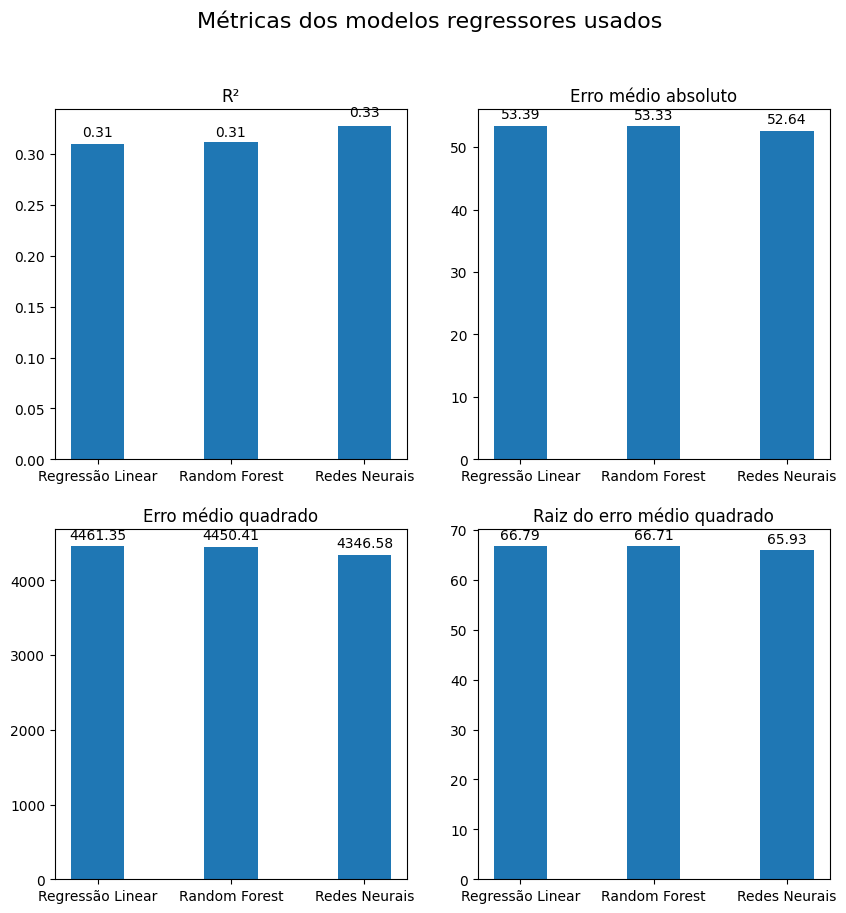

In [40]:
r2_data = [n['R2'] for n in all_metrics]
mae_data = [n['MAE'] for n in all_metrics]
mse_data = [n['MSE'] for n in all_metrics]
rmse_data = [n['RMSE'] for n in all_metrics]
models_used = ['Regressão Linear', 'Random Forest', 'Redes Neurais']
width = 0.4

fig, axs = plt.subplots(2, 2, figsize=(10,10))

# Gráfico de barras 1
b1 = axs[0, 0].bar(models_used, r2_data, width=width)
for bar in b1:
  height = round(bar.get_height(), 2)
  axs[0, 0].annotate('{}'.format(height),
  xy=(bar.get_x() + bar.get_width() / 2, height),
  xytext=(0, 3), # 3 points vertical offset
  textcoords="offset points",
  ha='center', va='bottom')
axs[0, 0].set_title("R²")

# Gráfico de barras 2
b2 = axs[0, 1].bar(models_used, mae_data, width=width)
for bar in b2:
  height = round(bar.get_height(), 2)
  axs[0, 1].annotate('{}'.format(height),
  xy=(bar.get_x() + bar.get_width() / 2, height),
  xytext=(0, 3), # 3 points vertical offset
  textcoords="offset points",
  ha='center', va='bottom')
axs[0, 1].set_title("Erro médio absoluto")

# Gráfico de barras 3
b3 = axs[1, 0].bar(models_used, mse_data, width=width)
for bar in b3:
  height = round(bar.get_height(), 2)
  axs[1, 0].annotate('{}'.format(height),
  xy=(bar.get_x() + bar.get_width() / 2, height),
  xytext=(0, 3), # 3 points vertical offset
  textcoords="offset points",
  ha='center', va='bottom')
axs[1, 0].set_title("Erro médio quadrado")

# Gráfico de barras 4
b4 = axs[1, 1].bar(models_used, rmse_data, width=width)
for bar in b4:
  height = round(bar.get_height(), 2)
  axs[1, 1].annotate('{}'.format(height),
  xy=(bar.get_x() + bar.get_width() / 2, height),
  xytext=(0, 3), # 3 points vertical offset
  textcoords="offset points",
  ha='center', va='bottom')
axs[1, 1].set_title("Raiz do erro médio quadrado")


fig.suptitle("Métricas dos modelos regressores usados", fontsize=16)

plt.show()


Text(0.5, 0, 'Features')

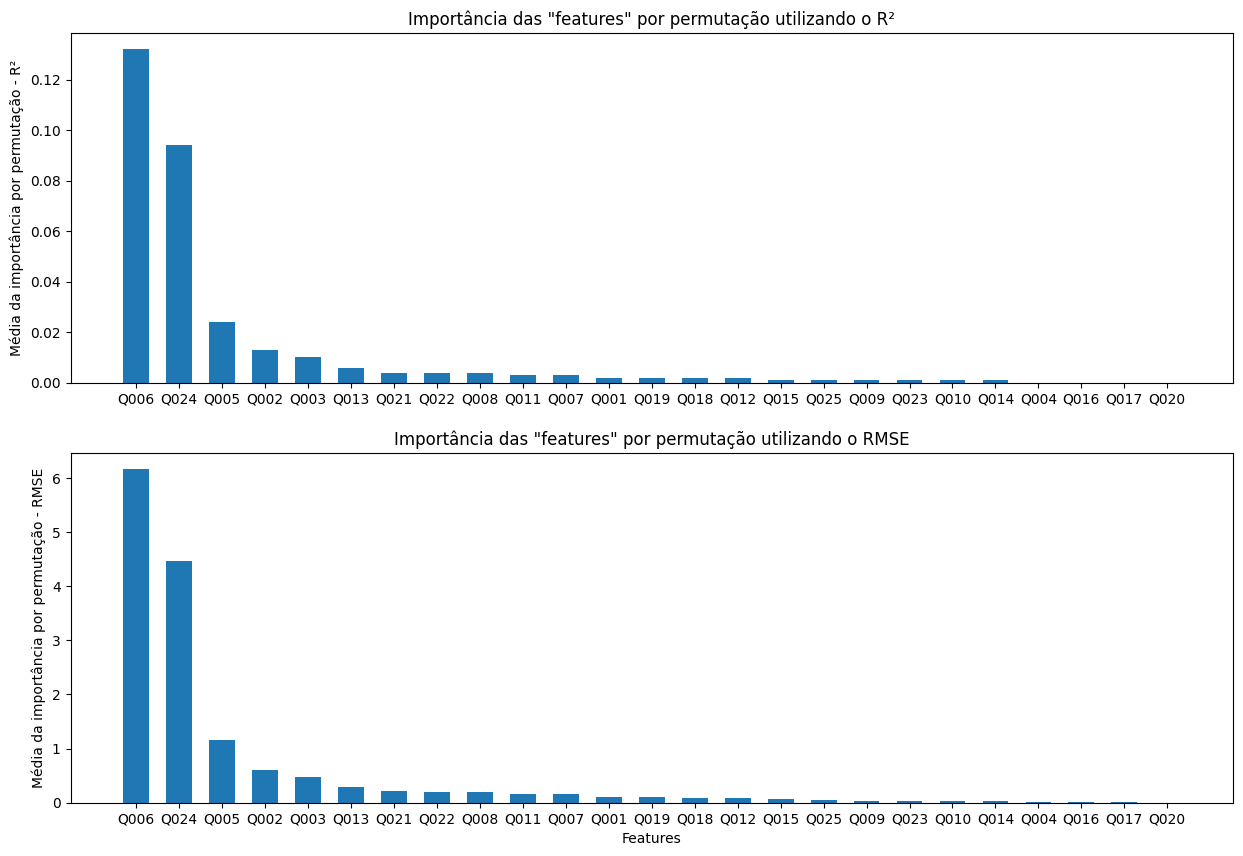

In [41]:

r2_feat = rna_perm_data['r2']['Features']
r2_mean = [float(n) for n in rna_perm_data['r2']['Mean']]

rmse_feat = rna_perm_data['neg_root_mean_squared_error']['Features']
rmse_mean = [float(n) for n in rna_perm_data['neg_root_mean_squared_error']['Mean']]
fig, axs = plt.subplots(2, 1, figsize=(15,10))
width = 0.6

axs[0].bar(r2_feat,r2_mean, width=width)
axs[0].set_title('Importância das "features" por permutação utilizando o R²')
axs[0].set_ylabel('Média da importância por permutação - R²')
axs[1].bar(rmse_feat,rmse_mean, width=width)
axs[1].set_title('Importância das "features" por permutação utilizando o RMSE')
axs[1].set_ylabel('Média da importância por permutação - RMSE')
axs[1].set_xlabel('Features')

In [42]:
all = sum(r2_mean)
x = r2_mean[0] + r2_mean[1]
print(all, x)

0.31100000000000005 0.226


['Nenhuma Renda', '<= R$ 1.100,00', '>= R$1.100,01 e <= R$ 1.650,00.', '>= R$ 1.650,01 e  <= R$ 2.200,00.', '>= R$ 2.200,01 e  <= R$ 2.750,00.', '>= R$ 2.750,01 e  <= R$ 3.300,00.', '>= R$ 3.300,01 e  <= R$ 4.400,00.', '>= R$ 4.400,01 e  <= R$ 5.500,00.', '>= R$ 5.500,01 e  <= R$ 6.600,00.', '>= R$ 6.600,01 e  <= R$ 7.700,00.', '>= R$ 7.700,01 e  <= R$ 8.800,00.', '>= R$ 8.800,01 e  <= R$ 9.900,00.', '>= R$ 9.900,01 e  <= R$ 11.000,00.', '>= R$ 11.000,01 e  <= R$ 13.200,00.', '>= R$ 13.200,01 e  <= R$ 16.500,00.', '>= R$ 16.500,01 e  <= R$ 22.000,00.', '> R$ 22.000,01.']


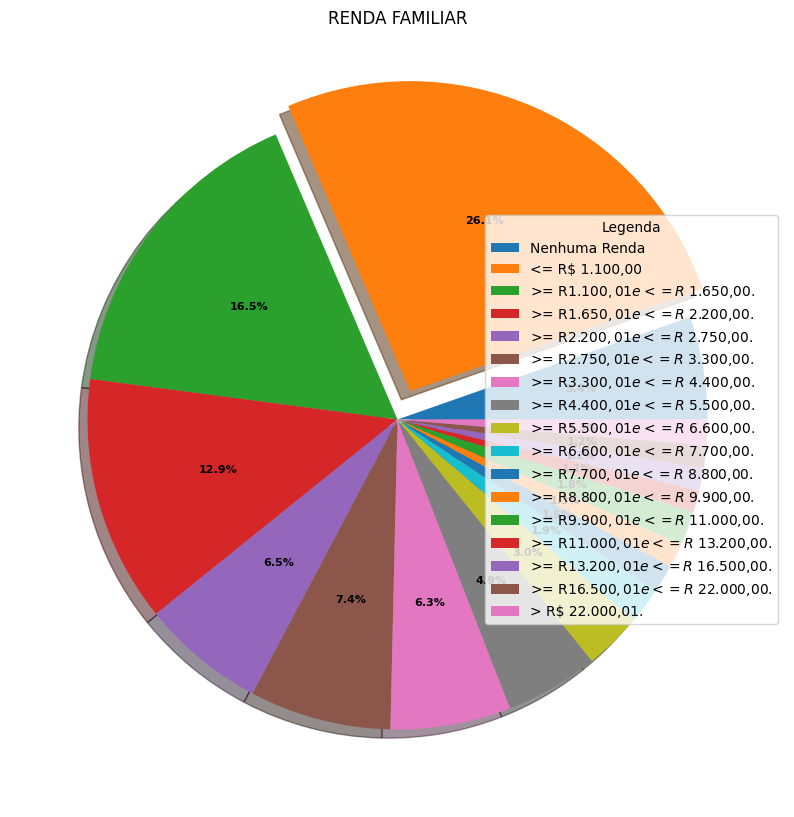

In [43]:
q = df['Q006']


label_bruta = '''Nenhuma Renda
<= R$ 1.100,00
>= R$1.100,01 e <= R$ 1.650,00.
>= R$ 1.650,01 e  <= R$ 2.200,00.
>= R$ 2.200,01 e  <= R$ 2.750,00.
>= R$ 2.750,01 e  <= R$ 3.300,00.
>= R$ 3.300,01 e  <= R$ 4.400,00.
>= R$ 4.400,01 e  <= R$ 5.500,00.
>= R$ 5.500,01 e  <= R$ 6.600,00.
>= R$ 6.600,01 e  <= R$ 7.700,00.
>= R$ 7.700,01 e  <= R$ 8.800,00.
>= R$ 8.800,01 e  <= R$ 9.900,00.
>= R$ 9.900,01 e  <= R$ 11.000,00.
>= R$ 11.000,01 e  <= R$ 13.200,00.
>= R$ 13.200,01 e  <= R$ 16.500,00.
>= R$ 16.500,01 e  <= R$ 22.000,00.
> R$ 22.000,01.'''

labels = label_bruta.split('\n')
print(labels)

sizes = [q.value_counts()[n]/len(df) for n in range(17)]
explode = np.zeros(len(labels))
explode[1] = 0.1

fig,ax = plt.subplots(figsize=(10,30))

wedges, texts, autotexts = ax.pie(sizes, explode=explode, autopct='%1.1f%%',
        shadow=True)


ax.legend(wedges, labels,
          title="Legenda",
          loc="right",
          )


plt.setp(autotexts, size=8, weight="bold")

ax.set_title("RENDA FAMILIAR")

plt.show()

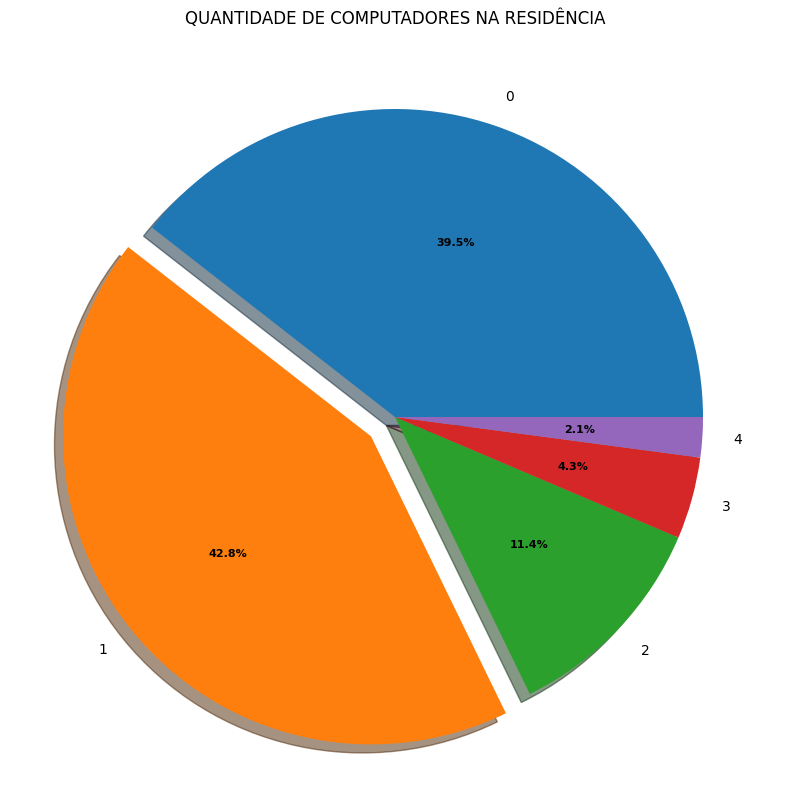

In [44]:
q = df['Q024']

labels = range(5)
sizes = [q.value_counts()[n]/len(q) for n in range(5)]
explode = np.zeros(len(sizes))
explode[1] = 0.1

fig,ax = plt.subplots(figsize=(10,10))

wedges, texts, autotexts = ax.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True)


plt.setp(autotexts, size=8, weight="bold")

ax.set_title("QUANTIDADE DE COMPUTADORES NA RESIDÊNCIA")

plt.show()

In [45]:
df.head()

,TP_FAIXA_ETARIA,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ANO_CONCLUIU,TP_ESCOLA,IN_TREINEIRO,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,...,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025,TP_SEXO_M,NOTA_MEDIA
1,12,1,1,1,11,1,0,505.9,551.8,498.3,...,0,1,0,0,2,0,0,0,1,504.375
3,3,1,3,1,0,2,0,580.7,678.9,638.9,...,0,1,0,0,1,0,1,1,1,639.500
4,2,1,3,1,0,2,0,497.7,532.4,457.6,...,0,1,0,1,4,0,1,1,0,517.575
8,8,1,3,1,0,2,0,487.4,476.5,450.7,...,0,1,0,0,1,0,0,1,0,477.000
9,4,1,3,1,0,2,0,507.6,539.2,494.6,...,1,2,1,0,2,0,0,1,0,488.675


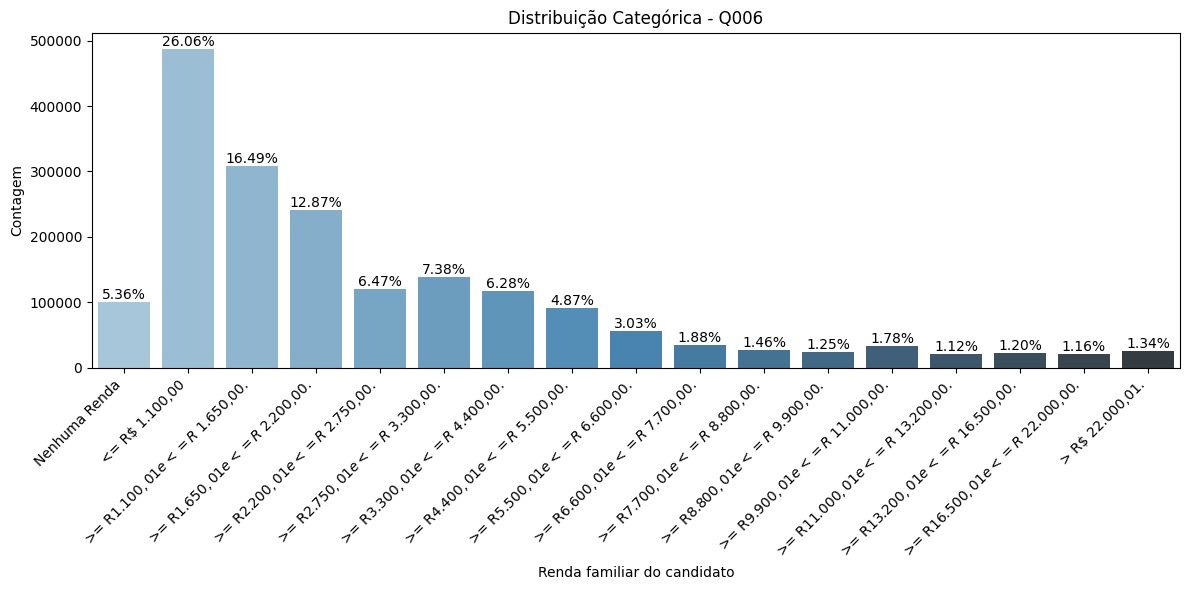

In [73]:
fig, ax = plt.subplots(figsize=(12,6))

sns.countplot(x=df['Q006'], palette='Blues_d', ax=ax)
total = float(len(df['Q006']))
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height/total:.2%}', (p.get_x() + p.get_width() / 2., height), ha='center', va='bottom')
plt.tight_layout()

plt.title('Distribuição Categórica - Q006')

plt.xticks(range(len(labels)), labels, rotation=45, ha='right')

plt.xlabel('Renda familiar do candidato')
plt.ylabel('Contagem')

plt.tight_layout()
plt.savefig('/content/drive/MyDrive/enem/q006_count.png')



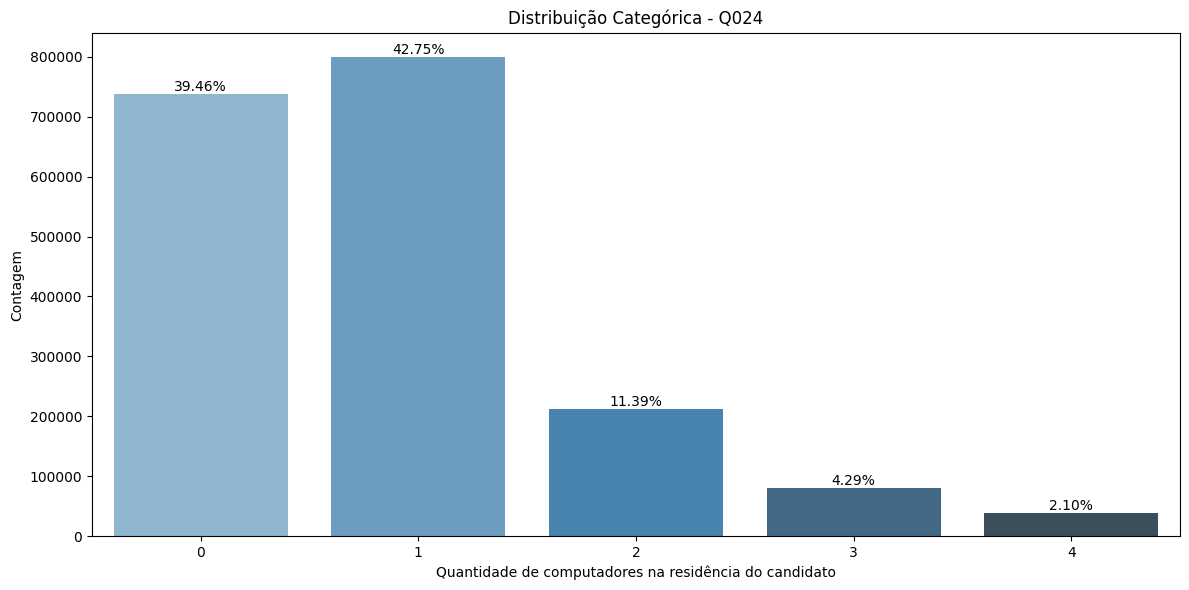

In [74]:
fig, ax = plt.subplots(figsize=(12,6))

sns.countplot(x=df['Q024'], palette='Blues_d', ax=ax)
total = float(len(df['Q024']))
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height/total:.2%}', (p.get_x() + p.get_width() / 2., height), ha='center', va='bottom')
plt.tight_layout()

plt.title('Distribuição Categórica - Q024')


plt.xlabel('Quantidade de computadores na residência do candidato')
plt.ylabel('Contagem')

plt.tight_layout()
plt.savefig('/content/drive/MyDrive/enem/q024_count.png')



In [56]:
label_bruta = '''Nenhuma Renda
<= R$ 1.100,00
>= R$1.100,01 e <= R$ 1.650,00.
>= R$ 1.650,01 e  <= R$ 2.200,00.
>= R$ 2.200,01 e  <= R$ 2.750,00.
>= R$ 2.750,01 e  <= R$ 3.300,00.
>= R$ 3.300,01 e  <= R$ 4.400,00.
>= R$ 4.400,01 e  <= R$ 5.500,00.
>= R$ 5.500,01 e  <= R$ 6.600,00.
>= R$ 6.600,01 e  <= R$ 7.700,00.
>= R$ 7.700,01 e  <= R$ 8.800,00.
>= R$ 8.800,01 e  <= R$ 9.900,00.
>= R$ 9.900,01 e  <= R$ 11.000,00.
>= R$ 11.000,01 e  <= R$ 13.200,00.
>= R$ 13.200,01 e  <= R$ 16.500,00.
>= R$ 16.500,01 e  <= R$ 22.000,00.
> R$ 22.000,01.'''

labels = label_bruta.split('\n')
labels

['Nenhuma Renda',
 '<= R$ 1.100,00',
 '>= R$1.100,01 e <= R$ 1.650,00.',
 '>= R$ 1.650,01 e  <= R$ 2.200,00.',
 '>= R$ 2.200,01 e  <= R$ 2.750,00.',
 '>= R$ 2.750,01 e  <= R$ 3.300,00.',
 '>= R$ 3.300,01 e  <= R$ 4.400,00.',
 '>= R$ 4.400,01 e  <= R$ 5.500,00.',
 '>= R$ 5.500,01 e  <= R$ 6.600,00.',
 '>= R$ 6.600,01 e  <= R$ 7.700,00.',
 '>= R$ 7.700,01 e  <= R$ 8.800,00.',
 '>= R$ 8.800,01 e  <= R$ 9.900,00.',
 '>= R$ 9.900,01 e  <= R$ 11.000,00.',
 '>= R$ 11.000,01 e  <= R$ 13.200,00.',
 '>= R$ 13.200,01 e  <= R$ 16.500,00.',
 '>= R$ 16.500,01 e  <= R$ 22.000,00.',
 '> R$ 22.000,01.']

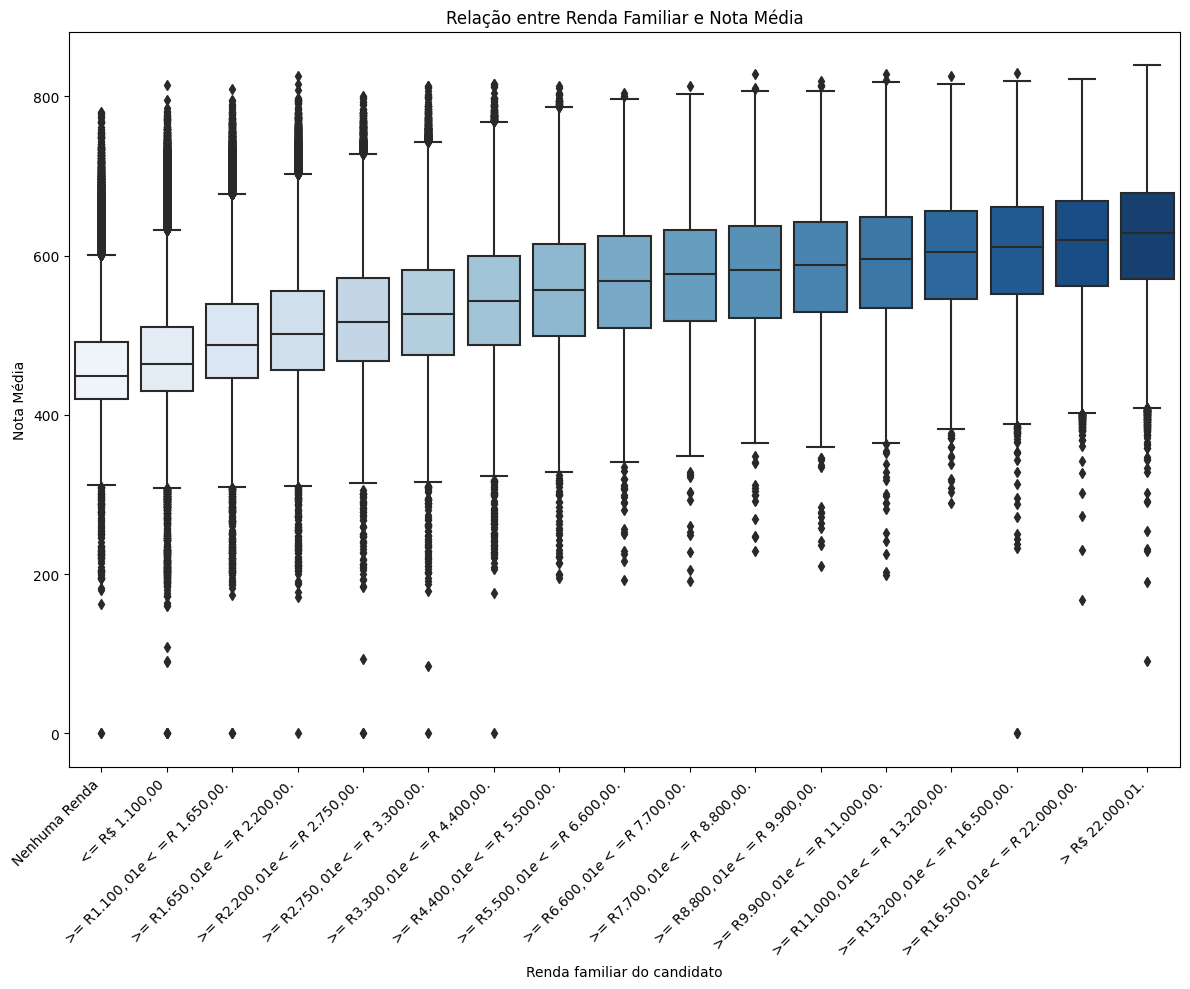

In [78]:
fig, ax = plt.subplots(figsize=(12,10))

sns.boxplot(y=df['NOTA_MEDIA'], x='Q006', data=df, palette='Blues')


plt.tight_layout()

plt.title('Relação entre Renda Familiar e Nota Média')


plt.xlabel('Renda Familiar')
plt.ylabel('Nota Média')


plt.xticks(range(len(labels)), labels, rotation=45, ha='right')

plt.xlabel('Renda familiar do candidato')


plt.tight_layout()
plt.savefig('/content/drive/MyDrive/enem/q006_box.png')





# plt.show()

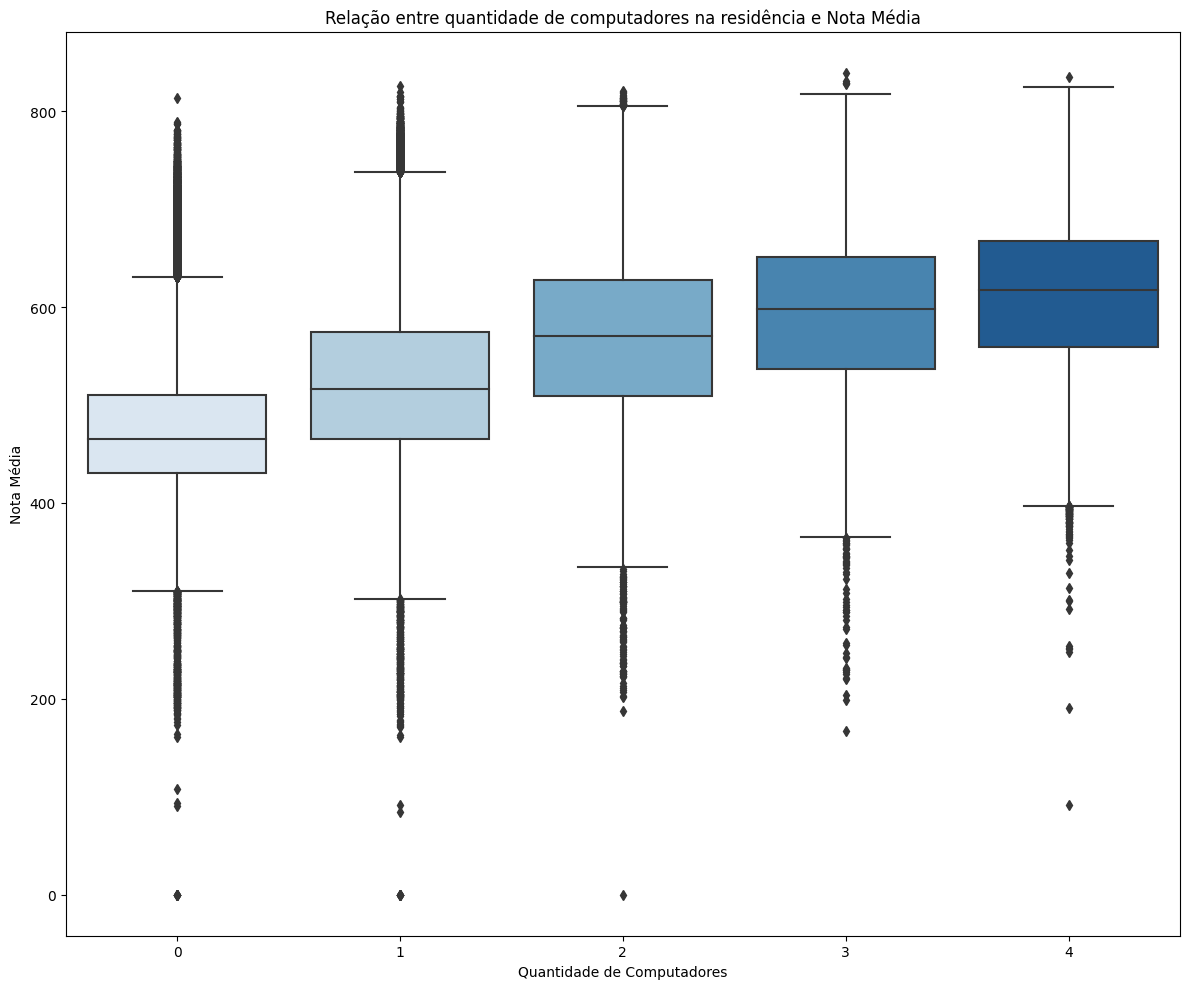

In [81]:
fig, ax = plt.subplots(figsize=(12,10))

sns.boxplot(y=df['NOTA_MEDIA'], x='Q024', data=df, palette='Blues')


plt.tight_layout()

plt.title('Relação entre quantidade de computadores na residência e Nota Média')


plt.xlabel('Quantidade de Computadores')
plt.ylabel('Nota Média')





plt.tight_layout()
plt.savefig('/content/drive/MyDrive/enem/q024_box.png')





plt.show()